  <div class="alert alert-info">
  Привет, Евгений! Меня зовут Светлана Чих и я буду проверять твой проект. Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе. Предлагаю общаться на «ты». Но если это не удобно - дай знать, и мы перейдем на «вы».

  <div class="alert alert-success">
  <b>👍 Успех:</b> Зелёным цветом отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах.
  </div>
  <div class="alert alert-warning">
  <b>🤔 Рекомендация:</b> Жёлтым цветом выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).
  </div>
  <div class="alert alert-danger">
  <b>😔 Необходимо исправить:</b> Красным цветом выделены комментарии, без исправления которых, я не смогу принять проект :(
  </div>
  <div class="alert alert-info">
  <b>👂 Совет:</b> Какие-то дополнительные материалы
  </div>
  Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом.
  Мне будет легче отследить изменения, если ты выделишь свои комментарии:
  <div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Например, вот так.</div>
  Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта быстрее.
   </div>

**Описание проекта**

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих бурёнок!

Поэтому он просит нас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:

1.	Первая будет прогнозировать возможный удой у коровы (целевой признак Удой);
2.	Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

С помощью модели нужно отобрать коров по двум критериям:

•	Средний удой за год — не менее 6000 килограммов,

•	Молоко должно быть вкусным.

**Описание данных**

•	ЭКЕ (Энергетическая кормовая единица) `'efu'` — измерение питательности корма коровы;

•	Сырой протеин `'raw_protein'` — содержание сырого протеина в корме, в граммах;

•	СПО (Сахаро-протеиновое соотношение) `'sugar_protein_ratio'` — отношение сахара к протеину в корме коровы;

•	Тип пастбища `'pasture_type'` — ландшафт лугов, на которых паслась корова;

•	`'id'` — номер коровы;

•	Порода `'breed'` — порода коровы;

•	Возраст `'age'` — бинарный признак (менее 2 лет, более 2 лет);

•	порода папы быка `'dad_breed'` — порода папы коровы;

•	Имя Папы `'dad_name'` — имя папы-быка

•	Жирность `'fat_%'` — содержание жиров в молоке, в процентах;

•	Белок `'protein_%'` — содержание белков в молоке, в процентах;

•	Вкус молока `'taste_milk'` — оценка вкуса по личным критериям фермера;

•	Удой `'milk_yield'` — масса молока, которую корова даёт в год, в килограммах.

Файл `ferma_main.csv` содержит данные о стаде фермера на текущий момент. Файл `ferma_dad.csv` хранит имя папы каждой коровы в стаде фермера. Файл `cow_buy.csv` — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. 

## Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns
import sklearn
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

<div class="alert alert-success">
<b>👍 Успех:</b> Импортированы нужные библиотеки!
</div>

In [2]:
data_ferma = pd.read_csv('/datasets/ferma_main.csv', sep = ';') # выгрузим данные с разделеителем ';' и сохраним в датафреймы
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep = ';')
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep = ';')

In [3]:
data_ferma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

In [4]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [5]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


**Вывод:** Мы определили, что в файлах данные по столбцам разделены знаком `;`, с учётом этого разделителя скачали и добавили их в датафрейм. По выведенной сводной информации о датафреймах мы видим, что названия столбцов не соответствуют "змеиному регистру", и то, что в части столбцов нужно изменить тип данных (со строковых на целочисленные или вещественные числа), так чтобы с ними можно было работать дальше.

<div class="alert alert-success">
<b>👍 Успех:</b> Данные загрузили.
При считывании данных из файла здорово перестраховывать себя от ошибок, связанных, например, с неверным указанием пути к файлу. А иногда бывает, что работаешь с файлом локально, выгружаешь его на сервер, ожидая, что он будет принимать данные, которые лежат на том же сервере, а код падает с ошибкой, потому что путь к файлу не поменялся с локального на серверный.
Для этого, например, можно использовать конструкцию `try-except`: сначала пробуешь локальный путь, при возникновении ошибки используется серверный путь (подробнее можешь почитать тут: https://pythonworld.ru/tipy-dannyx-v-python/isklyucheniya-v-python-konstrukciya-try-except-dlya-obrabotki-isklyuchenij.html).
Но еще лучше использовать библиотеку `os` - её использование позволит тебе проверять существование указанных директорий (что может быть актуально при одновременной работа на локальном и сетевом окружении) и загружать данные из существующей директории, избегая ошибок. Как пример:

    import os

    pth1 = '/folder_1/data.csv'
    pth2 = '/folder_2/data.csv'

    if os.path.exists(pth1):
        query_1 = pd.read_csv(pth1)
    elif os.path.exists(pth2):
        query_1 = pd.read_csv(pth2)
    else:
        print('Something is wrong')

Ещё на этапе считывания данных можно спарсить дату: за это действие отвечает параметр `parse_dates` метода `read_csv()`, в него нужно передать список с названием полей-дат, и в большинстве случаев дата будет корректно преобразована в нужный формат сразу:)
Также на этапе считывания данных задать индекс-столбец- за это действие отвечает параметр `index_col`.
</div>

  <div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Спасибо, Светлана! Не знал ничего про библиотеку os. Про parse_dates мне уже писал ревьюер по другому проекту, я взял на вооружение, но в данном проекте у нас нет дат в данных.</div>

##  Предобработка данных

In [6]:
# сделаем необходимые переименования
data_ferma.columns = ['id', 'milk_yield', 'efu', 'raw_protein', 'sugar_protein_ratio',\
                      'breed', 'pasture_type', 'dad_breed', 'fat_%', 'protein_%', 'taste_milk', 'age'] # дадим всем столбцам в трех датафреймах новые названия
ferma_dad.columns = ['id', 'dad_name']
cow_buy.columns = ['breed', 'pasture_type', 'dad_breed', 'dad_name', 'fat_%', 'protein_%', 'age']
data_ferma.head() # по первой таблице посмотрим общий вид после переименования

,id,milk_yield,efu,raw_protein,sugar_protein_ratio,breed,pasture_type,dad_breed,fat_%,protein_%,taste_milk,age
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [7]:
data_ferma['efu'].sort_values().unique() # посмотрим все уникальные значения по ЭКЕ

array(['10,9', '11,1', '11,5', '11,7', '11,8', '11,9', '12', '12,1',
       '12,2', '12,3', '12,4', '12,5', '12,6', '12,7', '12,8', '12,9',
       '13', '13,1', '13,2', '13,3', '13,4', '13,5', '13,6', '13,7',
       '13,8', '13,9', '14', '14,1', '14,2', '14,3', '14,4', '14,5',
       '14,6', '14,7', '14,8', '14,9', '15', '15,1', '15,2', '15,3',
       '15,4', '15,5', '15,6', '15,7', '15,8', '15,9', '16', '16,1',
       '16,2', '16,3', '16,4', '16,5', '16,6', '16,7', '16,8'],
      dtype=object)

In [8]:
data_ferma['sugar_protein_ratio'].sort_values().unique() # посмотрим все уникальные значения по СПО

array(['0,84', '0,85', '0,86', '0,88', '0,885', '0,89', '0,895', '0,9',
       '0,93', '0,94', '0,95', '0,96'], dtype=object)

In [9]:
data_ferma['fat_%'].sort_values().unique() # посмотрим все уникальные значения по жирности молока

array(['2,99', '3,01', '3,03', '3,11', '3,12', '3,13', '3,15', '3,16',
       '3,18', '3,19', '3,21', '3,22', '3,23', '3,24', '3,25', '3,26',
       '3,27', '3,28', '3,31', '3,32', '3,33', '3,34', '3,35', '3,37',
       '3,38', '3,39', '3,4', '3,41', '3,42', '3,44', '3,48', '3,49',
       '3,53', '3,54', '3,55', '3,57', '3,58', '3,59', '3,61', '3,62',
       '3,63', '3,64', '3,65', '3,69', '3,7', '3,71', '3,72', '3,73',
       '3,74', '3,75'], dtype=object)

In [10]:
data_ferma['protein_%'].sort_values().unique() # посмотрим все уникальные значения по содержанию белка в молоке

array(['3,069', '3,07', '3,071', '3,072', '3,073', '3,074', '3,075',
       '3,076', '3,077', '3,078', '3,079', '3,08', '3,081', '3,082',
       '3,085'], dtype=object)

In [11]:
def convert(row):     # задаем функцию для изменения типа данных в столбцах
    new_row = row.replace(',', '.')
    return float(new_row)

data_ferma['efu'] = data_ferma['efu'].apply(convert) # меняем тип данных в таблице по коровам фермера
data_ferma['sugar_protein_ratio'] = data_ferma['sugar_protein_ratio'].apply(convert)
data_ferma['fat_%'] = data_ferma['fat_%'].apply(convert)
data_ferma['protein_%'] = data_ferma['protein_%'].apply(convert)

In [12]:
data_ferma.info() # убедились, что замены произведены верно
data_ferma.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   634 non-null    int64  
 1   milk_yield           634 non-null    int64  
 2   efu                  634 non-null    float64
 3   raw_protein          634 non-null    int64  
 4   sugar_protein_ratio  634 non-null    float64
 5   breed                634 non-null    object 
 6   pasture_type         634 non-null    object 
 7   dad_breed            634 non-null    object 
 8   fat_%                634 non-null    float64
 9   protein_%            634 non-null    float64
 10  taste_milk           634 non-null    object 
 11  age                  634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


,id,milk_yield,efu,raw_protein,sugar_protein_ratio,breed,pasture_type,dad_breed,fat_%,protein_%,taste_milk,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [13]:
cow_buy['fat_%'] = cow_buy['fat_%'].apply(convert) # меняем тип данных в таблице по коровам, которых фермер хочет купить
cow_buy['protein_%'] = cow_buy['protein_%'].apply(convert)
cow_buy.info() # убедились, что замены произведены верно
cow_buy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   breed         20 non-null     object 
 1   pasture_type  20 non-null     object 
 2   dad_breed     20 non-null     object 
 3   dad_name      20 non-null     object 
 4   fat_%         20 non-null     float64
 5   protein_%     20 non-null     float64
 6   age           20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


,breed,pasture_type,dad_breed,dad_name,fat_%,protein_%,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> нельзя удалять строки не посмотрев на них, почему было принято решение, что это дубликаты? В датасете есть признаки, однозначно характеризующие корову? Фермеру предложили к покупке 20 коров, он ждет прогноз по всем 20, а не частично</s>
</div>

  <div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Спасибо за замечание. Убрал удаление. Я сначала так и понял, что эту базу не стоит трогать, но потом почему-то решил удалить. В данных конечно здесь нет ключа, и повторение всех значений точь-в-точь в реальности вполне возможно </div>

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [14]:
print(data_ferma.duplicated().sum()) # проверка на наличие полных дупликатов (строки должны быть уникальными по ключу 'id')
data_ferma = data_ferma.drop_duplicates().reset_index(drop=True) # удаление дубликатов
data_ferma['id'].duplicated().sum() # проверка на наличие дубликатов по столбцу 'id'

5


0

In [15]:
cow_buy['breed'].unique() # выявляем наличие неявных дубликатов в категориальных данных

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [16]:
cow_buy['pasture_type'].unique()

array(['холмистое', 'равнинное'], dtype=object)

In [17]:
cow_buy['dad_breed'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [18]:
cow_buy['dad_name'].unique()

array(['Геркулес', 'Буйный', 'Барин', 'Соловчик'], dtype=object)

In [19]:
ferma_dad['dad_name'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

In [20]:
data_ferma['breed'].unique() # выявляем наличие неявных дубликатов в категориальных данных

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [21]:
data_ferma['pasture_type'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [22]:
# убираем неявные дубли и приводим в соответствие с названиями в датафрейме 'cow_buy'
data_ferma['pasture_type'].replace({'Равнинные': 'равнинное', 'Равнинное': 'равнинное', 'Холмистое': 'холмистое'}, inplace = True)

In [23]:
data_ferma['dad_breed'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [24]:
data_ferma['dad_breed'].replace('Айдиалл', 'Айдиал', inplace = True) # убираем неявные дубли

In [25]:
data_ferma['taste_milk'].unique()

array(['вкусно', 'не вкусно'], dtype=object)

In [26]:
data_ferma['age'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

<div class="alert alert-success">
<b>👍 Успех:</b> Неявные дубликаты удалены!
</div>

**Вывод:**

Мы переименовали названия столбцов, так чтоюбы они соответствовали змеиному регистру (актуальные названия столбцов были указаны в описании данных перед кодом работы). Мы выясниили, что в столбцах по ЭКЕ, сахарно-протеиновому соотношению, жирности молока и содержанию белков в молоке данные имеют тип `'object'`, хотя судя по данным их тип должен быть `'float'`, чтобы можно было выполнять математические операции. Мы выяснили, что причина неправильного типа в том, что разделителем между дробной и целой частью служит знак `','`. Поэтому мы сделали разделителем знак `'.'` и изменили тип данных в указанных столбцах. Аналогично мы поменяли тип данных с `'object'` на `'float'` для жирности и содержания белков в датафрейме с данными по коровам, которых фермер хочет купить. 

В данных не обнаружено пропусков, но были обнаружены дубликаты. Мы удалили 5 полных дубликатов из датафрейма с данными стада фермера на текущий момент и 4 дубликата из датафрейма по коровам, которых фермер хочет купить. Также мы проверили наличие неявных дубликатов в категориальных данных и устранили дублирующие названия в столбцах с типом пастбищ и названием породы отца каждой коровы на ферме. Кроме того, мы сравнили значения в категориальных столбцах двух датафреймов и привели их к единообразию.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

## Исследовательский анализ данных

1.	Проведите статистический анализ всех признаков.

2.	Постройте графики, которые описывают все признаки. Помните, что количественным и категориальным данным подходят разные графики.

3.	Сделайте выводы о данных

In [27]:
data_ferma['milk_yield'].describe() # выведем описательные статистики по удою молока

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: milk_yield, dtype: float64

Text(0, 0.5, 'Частоты')

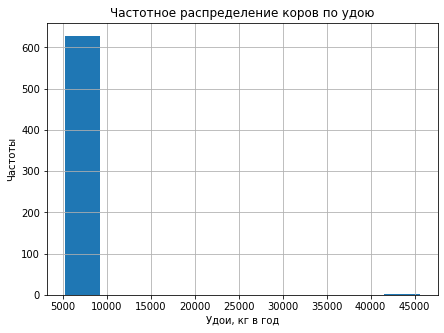

In [28]:
# построим гистограмму частотного распределения удоев
data_ferma['milk_yield'].hist(grid=True, bins=10, figsize = (7, 5))
plt.title("Частотное распределение коров по удою")
plt.xlabel('Удои, кг в год')
plt.ylabel('Частоты')

In [29]:
# мы видим выбросы на графике, посмотрим, сколько в таблице строк с аномальным значением по удою
data_ferma.query('milk_yield > 10000')

,id,milk_yield,efu,raw_protein,sugar_protein_ratio,breed,pasture_type,dad_breed,fat_%,protein_%,taste_milk,age
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет


count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: milk_yield, dtype: float64


Text(0, 0.5, 'Частоты')

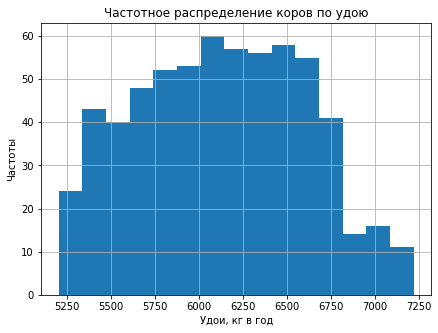

In [30]:
# мы увидели, что аномальное значение одно (вероятно это ошибочное значение), удалим строку с аномальным значением по удою из двух датафреймов
data_ferma = data_ferma.loc[data_ferma['milk_yield'] < 10000].reset_index(drop=True)
ferma_dad = ferma_dad.query('id != 17').reset_index(drop=True)
# выведем описательные статистики по удою молока после удаления аномалии
print(data_ferma['milk_yield'].describe())
data_ferma['milk_yield'].hist(grid=True, bins=15, figsize = (7, 5))
plt.title("Частотное распределение коров по удою")
plt.xlabel('Удои, кг в год')
plt.ylabel('Частоты')

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно! Ни одна корова не может давать столько молока, это явная аномалия
</div>

Text(0.5, 1.0, 'Диаграмма размаха для объема удоев в год')

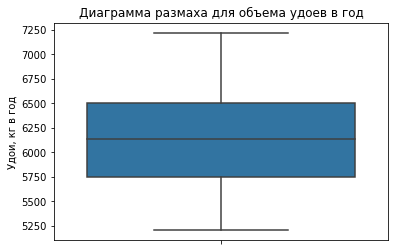

In [31]:
# построим диаграмму размаха для удоев
sns.boxplot(data = data_ferma, y = 'milk_yield')
plt.ylabel('Удои, кг в год')
plt.title("Диаграмма размаха для объема удоев в год")

In [32]:
data_ferma['efu'].describe() # выведем описательные статистики по ЭКЕ

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: efu, dtype: float64

Text(0, 0.5, 'Частоты')

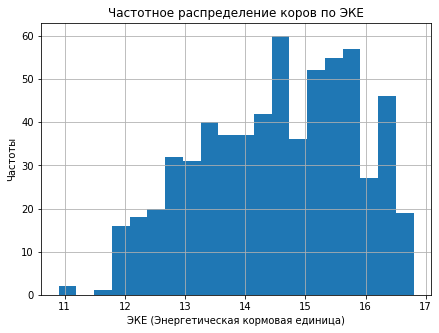

In [33]:
# построим гистограмму частотного распределения коров по ЭКЕ
data_ferma['efu'].hist(grid=True, bins=20, figsize = (7, 5))
plt.title("Частотное распределение коров по ЭКЕ")
plt.xlabel('ЭКЕ (Энергетическая кормовая единица)')
plt.ylabel('Частоты')

Text(0.5, 1.0, 'Диаграмма размаха для ЭКЕ')

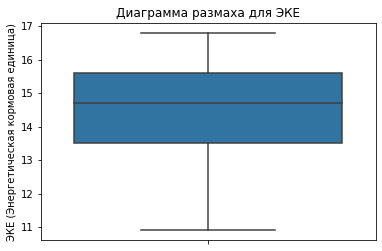

In [34]:
# построим диаграмму размаха для ЭКЕ
sns.boxplot(data = data_ferma, y = 'efu')
plt.ylabel('ЭКЕ (Энергетическая кормовая единица)')
plt.title("Диаграмма размаха для ЭКЕ")

In [35]:
data_ferma['raw_protein'].describe() # выведем описательные статистики по содержанию сырого протеина в корме

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: raw_protein, dtype: float64

Text(0, 0.5, 'Частоты')

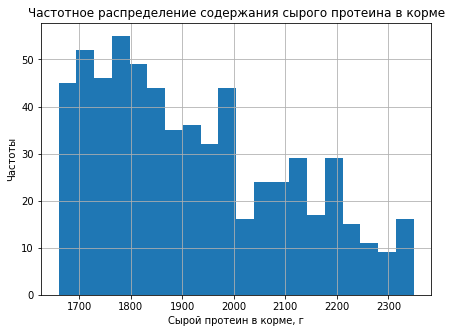

In [36]:
# построим гистограмму частотного распределения коров по содержанию сырого протеина в корме
data_ferma['raw_protein'].hist(grid=True, bins=20, figsize = (7, 5))
plt.title("Частотное распределение содержания сырого протеина в корме")
plt.xlabel('Сырой протеин в корме, г')
plt.ylabel('Частоты')

Text(0.5, 1.0, 'Диаграмма размаха для содержания сырого протеина в корме')

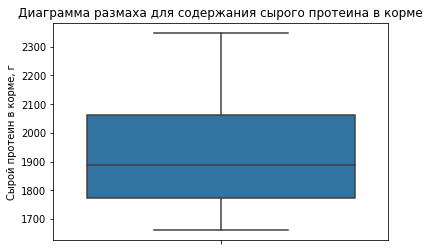

In [37]:
# построим диаграмму размаха
sns.boxplot(data = data_ferma, y = 'raw_protein')
plt.ylabel('Сырой протеин в корме, г')
plt.title("Диаграмма размаха для содержания сырого протеина в корме")

In [38]:
data_ferma['sugar_protein_ratio'].describe() # выведем описательные статистики по сахаро-протеиновому соотношению

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: sugar_protein_ratio, dtype: float64

Text(0, 0.5, 'Частоты')

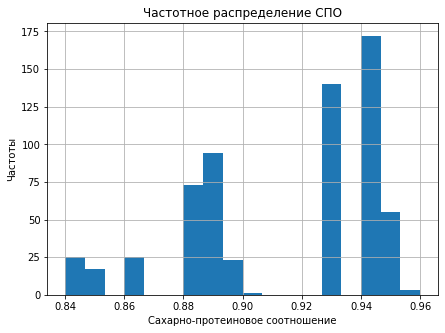

In [39]:
# построим гистограмму частотного распределения по сахаро-протеиновому соотношению
data_ferma['sugar_protein_ratio'].hist(grid=True, bins=18, figsize = (7, 5))
plt.title("Частотное распределение СПО")
plt.xlabel('Сахарно-протеиновое соотношение')
plt.ylabel('Частоты')

Text(0.5, 1.0, 'Диаграмма размаха для сахарно-протеинового соотношения')

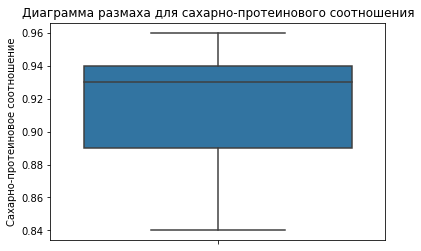

In [40]:
# построим диаграмму размаха
sns.boxplot(data = data_ferma, y = 'sugar_protein_ratio')
plt.ylabel('Сахарно-протеиновое соотношение')
plt.title("Диаграмма размаха для сахарно-протеинового соотношения")

In [41]:
data_ferma['fat_%'].describe() # выведем описательные статистики по жирности молока

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: fat_%, dtype: float64

Text(0, 0.5, 'Частоты')

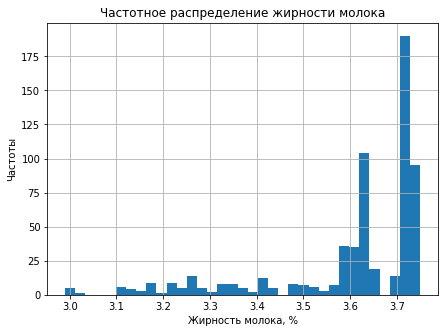

In [42]:
# построим гистограмму частотного распределения по жирности молока
data_ferma['fat_%'].hist(bins=35, grid=True, figsize = (7, 5))
plt.title("Частотное распределение жирности молока")
plt.xlabel('Жирность молока, %')
plt.ylabel('Частоты')

Text(0.5, 1.0, 'Диаграмма размаха для жирности молока')

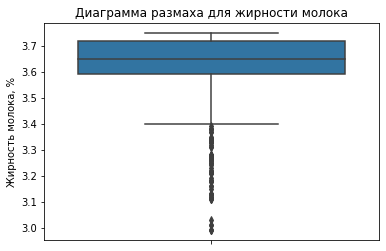

In [43]:
# построим диаграмму размаха для жирности молока
sns.boxplot(data = data_ferma, y = 'fat_%')
plt.ylabel('Жирность молока, %')
plt.title("Диаграмма размаха для жирности молока")

<div class="alert alert-warning">
<b>🤔 Рекомендация:</b> Все значения реальны и расположены довольно компактно, их нельзя назвать выбросами
</div>

  <div class="alert alert-info"> <b>🎓 Комментарий студента:</b> В теории Практикума, где рассматривались диаграммы размаха, все значения за пределами усов на графике были названы выбросами. Я понял, что в данном случае мы имеем реальные, а не ошибочные цифры, поэтому удалять их будет неправильно </div>

In [44]:
data_ferma['protein_%'].describe() # выведем описательные статистики по содержанию белков в молоке

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: protein_%, dtype: float64

Text(0, 0.5, 'Частоты')

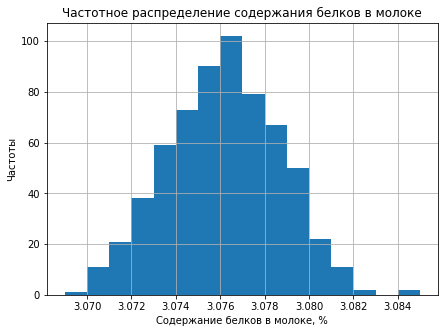

In [45]:
# построим гистограмму частотного распределения по содержанию белков
data_ferma['protein_%'].hist(bins=16, grid=True, figsize = (7, 5))
plt.title("Частотное распределение содержания белков в молоке")
plt.xlabel('Содержание белков в молоке, %')
plt.ylabel('Частоты')

Text(0.5, 1.0, 'Диаграмма размаха для содержания белков в молоке')

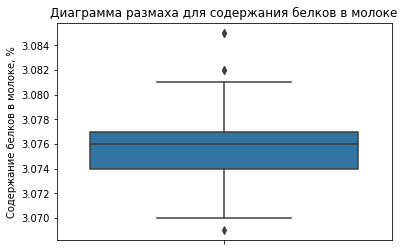

In [46]:
# построим диаграмму размаха
sns.boxplot(data = data_ferma, y = 'protein_%')
plt.ylabel('Содержание белков в молоке, %')
plt.title("Диаграмма размаха для содержания белков в молоке")

In [47]:
data_ferma['breed'].value_counts() # выведем статистику по породам коров

Вис Бик Айдиал     372
РефлешнСоверинг    256
Name: breed, dtype: int64

Text(0.5, 1.0, 'Распределение пород коров на ферме')

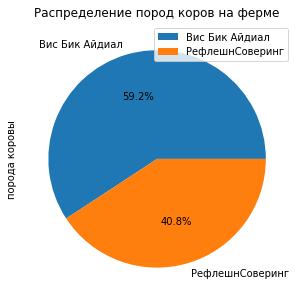

In [48]:
# построим круговую диаграмму, показывающую распределение пород коров
data_ferma['breed'].value_counts().plot(figsize = (7, 5), kind = 'pie', legend=True, ylabel = 'порода коровы',\
                         autopct = '%1.1f%%')
plt.title('Распределение пород коров на ферме')

In [49]:
data_ferma['pasture_type'].value_counts() # выведем статистику по типам пастбищ

холмистое    350
равнинное    278
Name: pasture_type, dtype: int64

Text(0.5, 1.0, 'Распределение типов пастбищ')

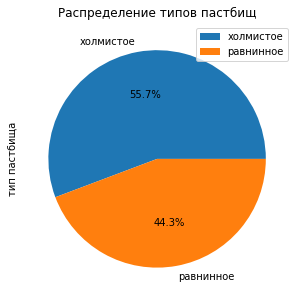

In [50]:
# построим круговую диаграмму, показывающую распределение типов пастбищ
data_ferma['pasture_type'].value_counts().plot(figsize = (7, 5), kind = 'pie', legend=True, ylabel = 'тип пастбища',\
                         autopct = '%1.1f%%')
plt.title('Распределение типов пастбищ')

In [51]:
data_ferma['dad_breed'].value_counts() # выведем статистику по породе папы коровы на ферме

Айдиал     317
Соверин    311
Name: dad_breed, dtype: int64

Text(0.5, 1.0, 'Породы пап коров на ферме')

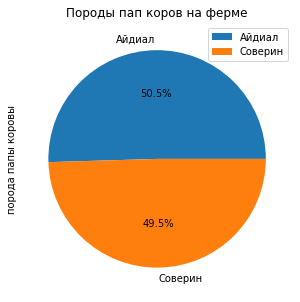

In [52]:
# построим круговую диаграмму, показывающую распределение пород пап коров
data_ferma['dad_breed'].value_counts().plot(figsize = (7, 5), kind = 'pie', legend=True, ylabel = 'порода папы коровы',\
                         autopct = '%1.1f%%')
plt.title('Породы пап коров на ферме')

In [53]:
data_ferma['taste_milk'].value_counts() # выведем статистику по вкусу молока

вкусно       370
не вкусно    258
Name: taste_milk, dtype: int64

Text(0.5, 1.0, 'Вкус молока от коров на ферме')

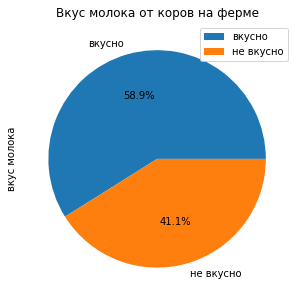

In [54]:
# построим круговую диаграмму, показывающую распределение вкуса молока
data_ferma['taste_milk'].value_counts().plot(figsize = (7, 5), kind = 'pie', legend=True, ylabel = 'вкус молока',\
                         autopct = '%1.1f%%')
plt.title('Вкус молока от коров на ферме')

In [55]:
data_ferma['age'].value_counts() # выведем статистику по возрасту коров

более_2_лет    518
менее_2_лет    110
Name: age, dtype: int64

Text(0.5, 1.0, 'Возраст коров на ферме')

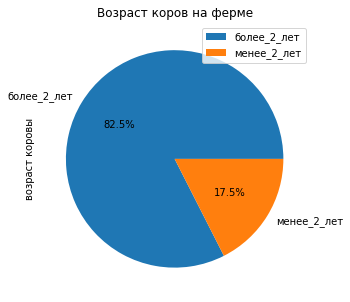

In [56]:
# построим круговую диаграмму, показывающую распределение возраста коров
data_ferma['age'].value_counts().plot(figsize = (7, 5), kind = 'pie', legend=True, ylabel = 'возраст коровы',\
                                     autopct = '%1.1f%%')
plt.title('Возраст коров на ферме')

In [57]:
ferma_dad['dad_name'].value_counts() # выведем статистику по именам пап коров

Барин       240
Буйный      214
Соловчик    110
Геркулес     64
Name: dad_name, dtype: int64

Text(0, 0.5, 'частоты')

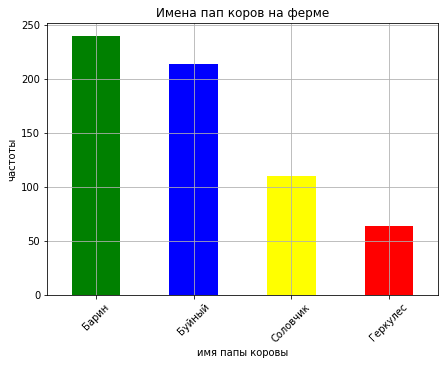

In [58]:
# построим столбчатую диаграмму по именам пап коров на ферме
ferma_dad['dad_name'].value_counts().plot(figsize = (7, 5), kind = 'bar', rot = 45, color = ['green', 'blue', 'yellow', 'red'], grid = True)
plt.title('Имена пап коров на ферме')
plt.xlabel('имя папы коровы')
plt.ylabel('частоты')

**Выводы:** 

Мы провели статистический анализ всех признаков, построили соответсвующие графики для описания каждого из признаков. Для количественных данных мы использовали гистраграммы и диаграммы размаха, а для категориальных данных круговые диаграммы и столбчатую диаграмму. 

В данных по удоям (`milk_yield`) было обнаружено одно анамальное значение (явно это ошибка данных), мы удалили его, после чего график по целевому признаку показал распределение близкое к нормальному. Распределение по ЭКЕ (`efu`) также близко к нормальному и не содержит выбросов, аномальных значений. Распределение содержания сырого протеина в корме (`raw_protein`) уже нельзя назвать нормальным, мы получаем ассиметричный график с гораздо меньшим диапазоном значений слева от среднего значения по сравнению с правой частью от среднего. Выбросов по сырому протеину не наблюдается. По сахаро-протеиновому соотношению (`sugar_protein_ratio`) мы видим, что график также не показал нормального распределения, можно условно выделить две группы зачений - более 0.91 и менее 0.91. Группа значение СПО более 0.91 более многочисленная, медианное значение для признака - 0.93. Для жирности (`fat_%`) мы наблюдаем 81 значение ниже 3.4, которые по графику диаграммы размаха идентифицируются как выбросы. Удалять эти значения не стоит, их слишком много, и очевидно они представляют реальные, а не ошибочные значения, таким образом, при удалении мы потеряем много важных для модели значений. По признаку содержания белков в молоке (`protein_%`) мы получили график нормального распределения, даже несмотря на то, что есть небольшое кол-во выбросов. В данном случае выбросами можно принебречь, они не так сильно расходятся с остальными значениями, и их сравнительно мало, чтобы оказать влияние на прогнозные значения. При построении прогнозных моделей стоит более внимательно относиться к признакам с распределением, отличным от нормального, возможно, от части из них стоит отказаться, а часть, вероятно, имеет смысл свести к категориальным признакам.

По каждому из категориальных признаков `taste_milk` (вкус молока), `breed` (порода), `dad_breed` (порода папы), `pasture_type` (тип пастбища), `age` (возраст коровы) есть всего 2 значения, а по признаку `dad_name` (имя папы) данные содержат 4 отличных значения. По признаку `dad_breed` кол-во двух разных значений практически одинаково (разница - 1%), тогда как по другим признакам значения распределены в разных пропорциях. Наибольшая разница наблюдается в значениях по возрасту, на ферме всего 17,5% коров возрастом менее 2-х лет, тогда как 82,5% коров имеет возраст старше 2-х лет. Также мы видим, что имя папы "Барин" боле чем в два раза встречается чаще чем имя "Соловчик" и почти в 4 раза чаще имени "Геркулес". Неравномерно распределение категориальных признаков следует иметь в виду при определении зависимостей между признаками.  

<div class="alert alert-success">
<b>👍 Успех:</b> Отличный анализ, молодец!
</div>

## Корреляционный анализ

1.	Изучите взаимосвязь между признаками: рассчитайте коэффициенты корреляции между всеми признаками. 

2.	Постройте диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков.

3.	Сделайте выводы о взаимосвязи признаков.


<AxesSubplot:>

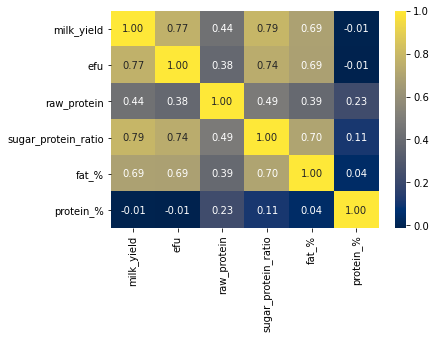

In [59]:
# построим таблицу коэффициентов корреляции между количественными признаками
sns.heatmap(data_ferma[['milk_yield', 'efu', 'raw_protein', 'sugar_protein_ratio', 'fat_%', 'protein_%']].corr('spearman'), annot=True, fmt='.2f', cmap='cividis')

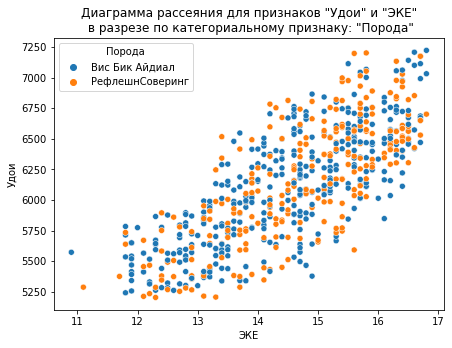

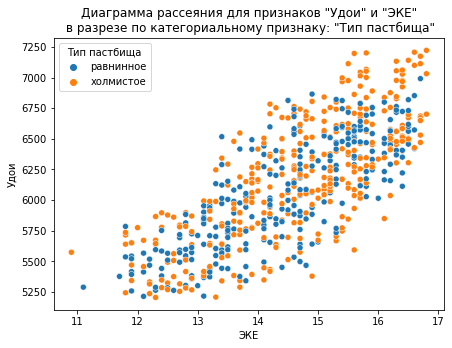

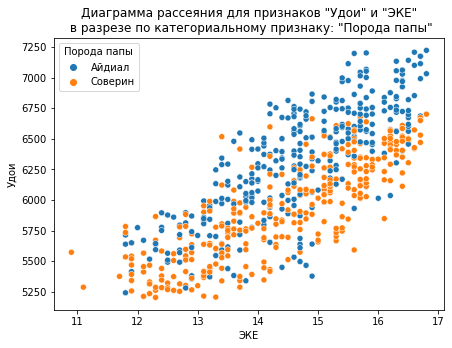

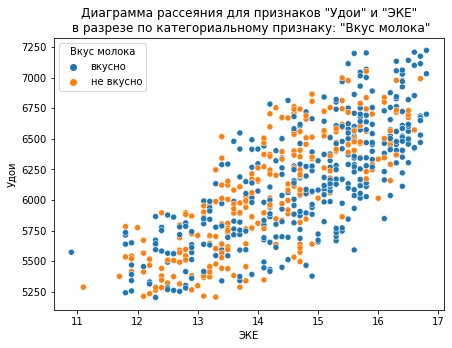

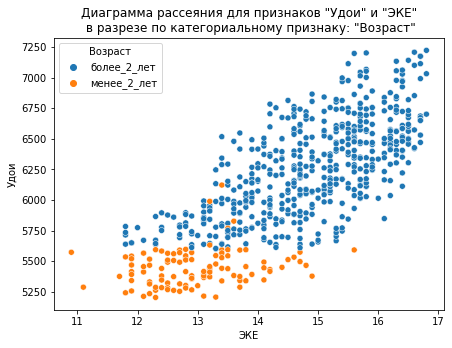

In [60]:
# зададим лист из категориальных признаков 
# построим диаграммы рассения для целевого признака 'milk_yield' и количественного признака 'efu' с учётом значений категориальных признаков
category_group = ['breed', 'pasture_type', 'dad_breed', 'taste_milk', 'age']
category_name = ['Порода', 'Тип пастбища', 'Порода папы', 'Вкус молока', 'Возраст']

for i in range(len(category_group)):
    plt.figure(figsize = (7, 5))
    sns.scatterplot(data = data_ferma, x='efu', y = 'milk_yield', hue = category_group[i])
    plt.title(f'Диаграмма рассеяния для признаков "Удои" и "ЭКЕ"\n в разрезе по категориальному признаку: "{category_name[i]}"')
    plt.xlabel('ЭКЕ')
    plt.ylabel('Удои')
    plt.legend(title = category_name[i])

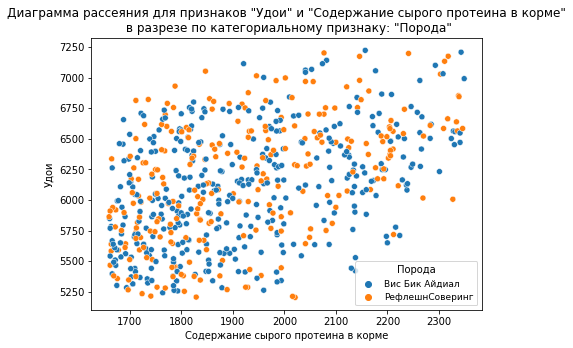

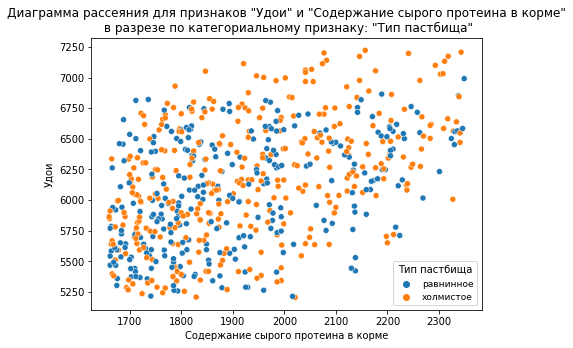

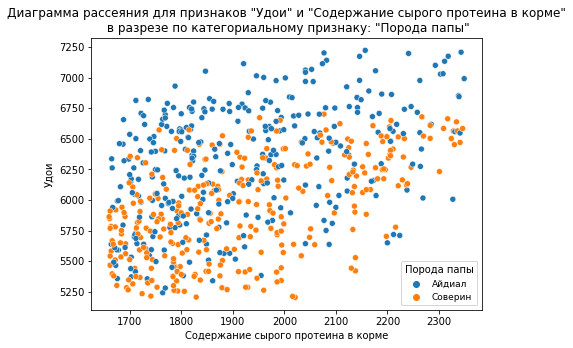

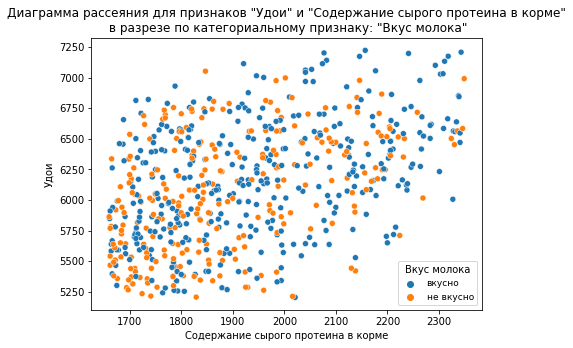

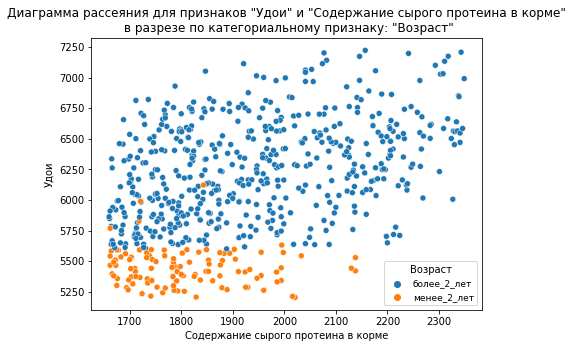

In [61]:
# построим диаграммы рассения для целевого признака 'milk_yield' и количественного признака 'raw_protein' с учётом значений категориальных признаков
for i in range(len(category_group)):
    plt.figure(figsize = (7, 5))
    sns.scatterplot(data = data_ferma, x='raw_protein', y = 'milk_yield', hue = category_group[i])
    plt.title(f'Диаграмма рассеяния для признаков "Удои" и "Содержание сырого протеина в корме"\n в разрезе по категориальному признаку: "{category_name[i]}"')
    plt.xlabel('Содержание сырого протеина в корме')
    plt.ylabel('Удои')
    plt.legend(title = category_name[i], fontsize = '9', loc = 'lower right')

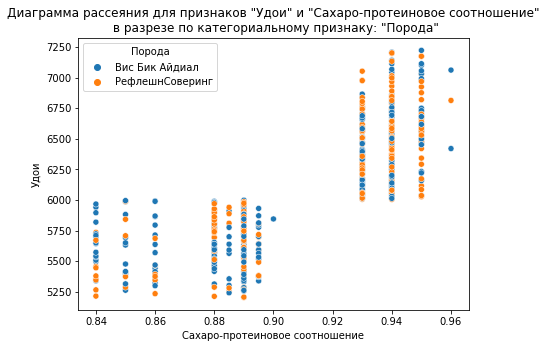

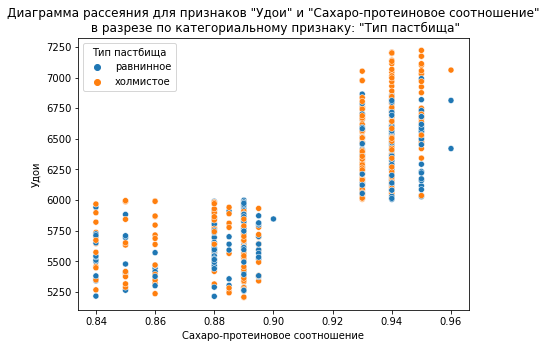

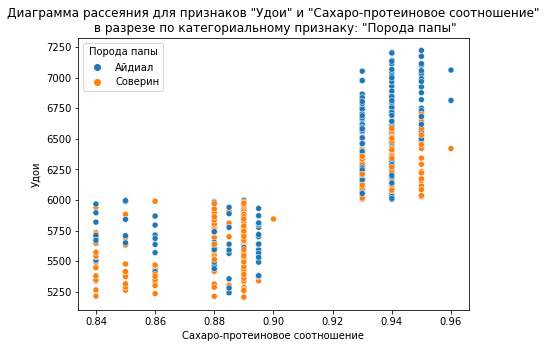

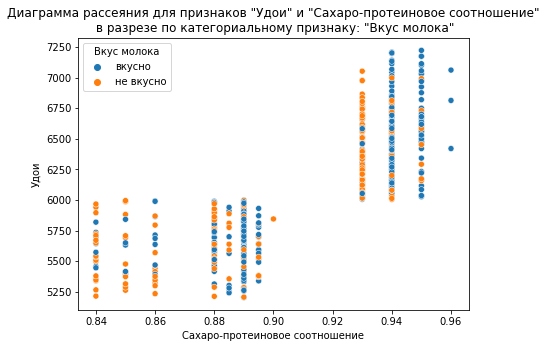

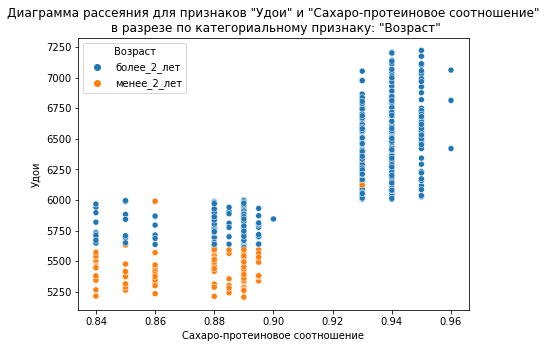

In [62]:
# построим диаграммы рассения для целевого признака 'milk_yield' и количественного признака 'sugar_protein_ratio' с учётом значений категориальных признаков
for i in range(len(category_group)):
    plt.figure(figsize = (7, 5))
    sns.scatterplot(data = data_ferma, x='sugar_protein_ratio', y = 'milk_yield', hue = category_group[i])
    plt.title(f'Диаграмма рассеяния для признаков "Удои" и "Сахаро-протеиновое соотношение"\n в разрезе по категориальному признаку: "{category_name[i]}"')
    plt.xlabel('Сахаро-протеиновое соотношение')
    plt.ylabel('Удои')
    plt.legend(title = category_name[i])

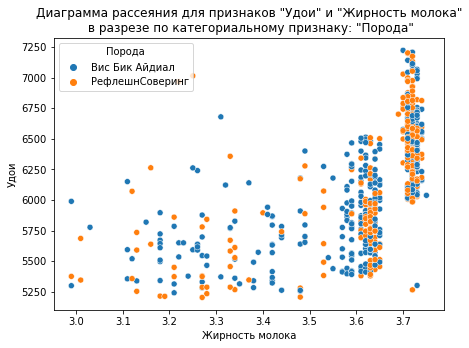

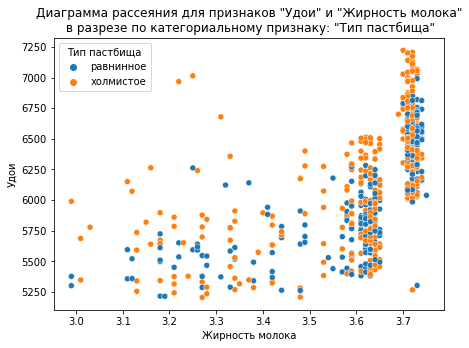

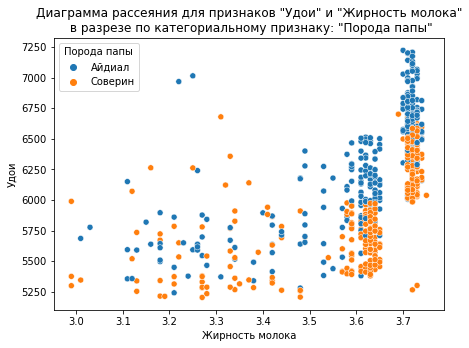

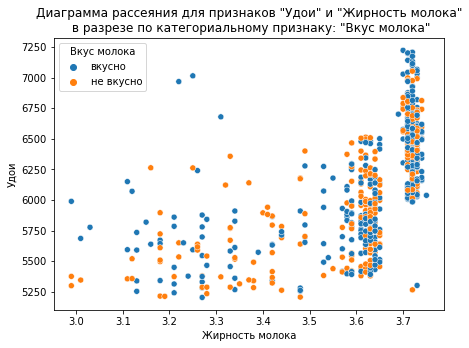

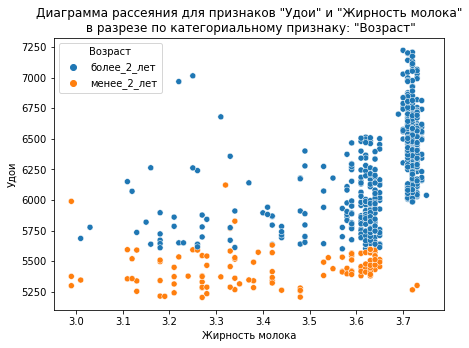

In [63]:
# построим диаграммы рассения для целевого признака 'milk_yield' и количественного признака 'fat_%' с учётом значений категориальных признаков
for i in range(len(category_group)):
    plt.figure(figsize = (7, 5))
    sns.scatterplot(data = data_ferma, x='fat_%', y = 'milk_yield', hue = category_group[i])
    plt.title(f'Диаграмма рассеяния для признаков "Удои" и "Жирность молока"\n в разрезе по категориальному признаку: "{category_name[i]}"')
    plt.xlabel('Жирность молока')
    plt.ylabel('Удои')
    plt.legend(title = category_name[i])

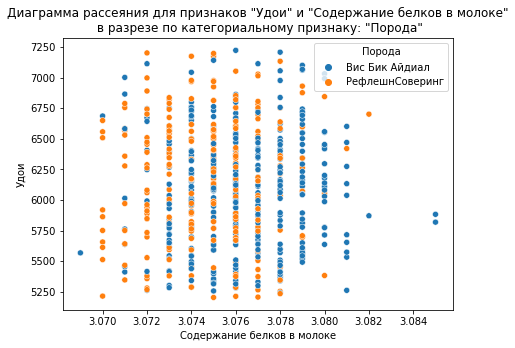

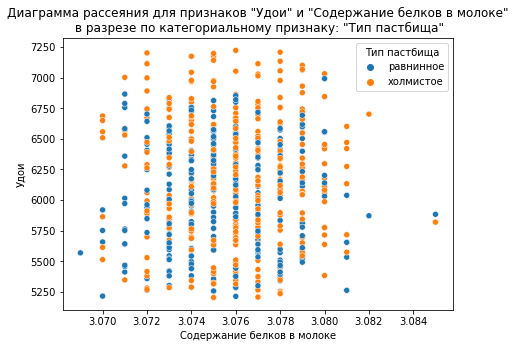

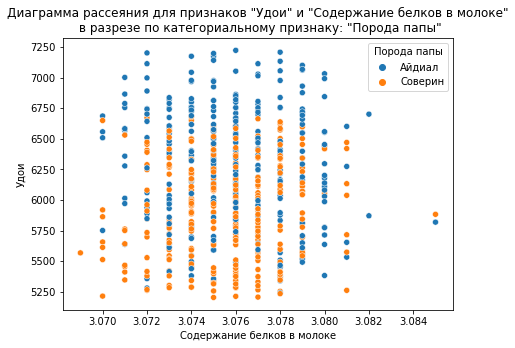

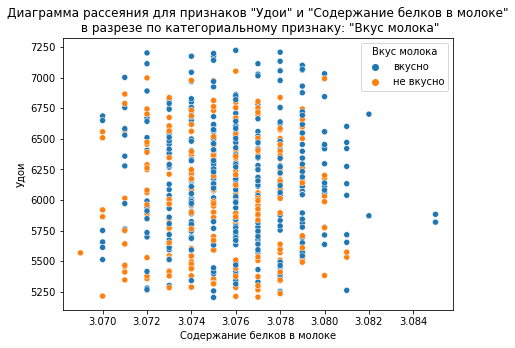

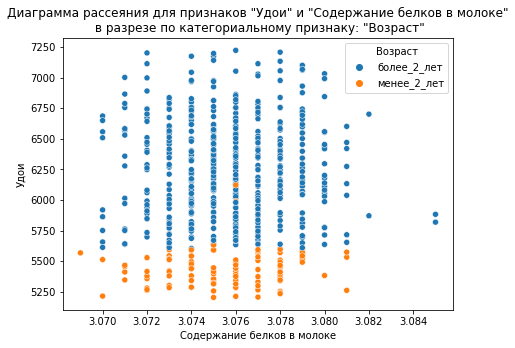

In [64]:
# построим диаграммы рассения для целевого признака 'milk_yield' и количественного признака 'protein_%' с учётом значений категориальных признаков
for i in range(len(category_group)):
    plt.figure(figsize = (7, 5))
    sns.scatterplot(data = data_ferma, x='protein_%', y = 'milk_yield', hue = category_group[i])
    plt.title(f'Диаграмма рассеяния для признаков "Удои" и "Содержание белков в молоке"\n в разрезе по категориальному признаку: "{category_name[i]}"')
    plt.xlabel('Содержание белков в молоке')
    plt.ylabel('Удои')
    plt.legend(title = category_name[i])

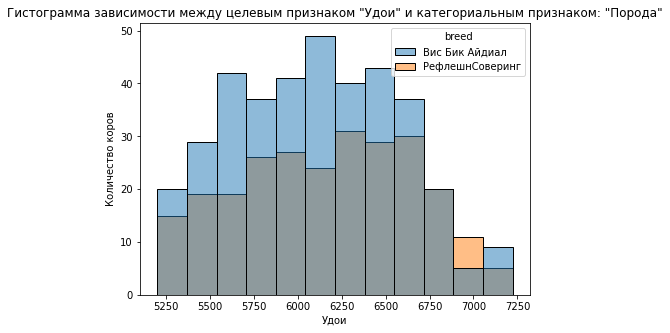

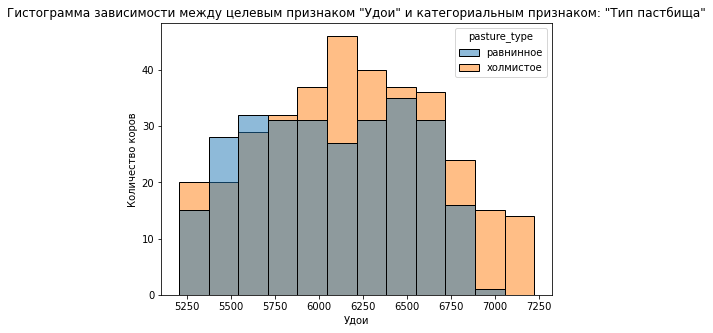

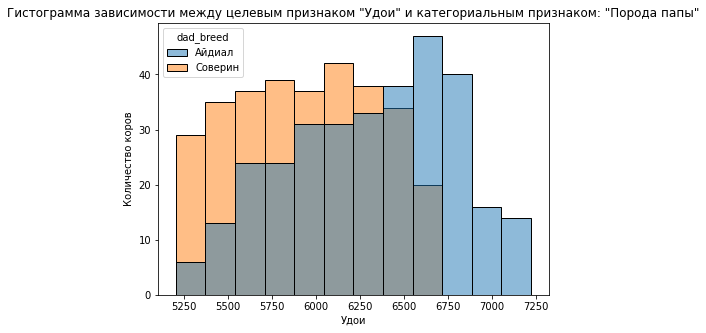

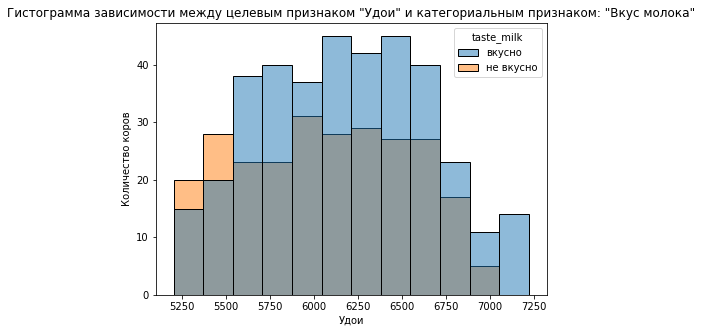

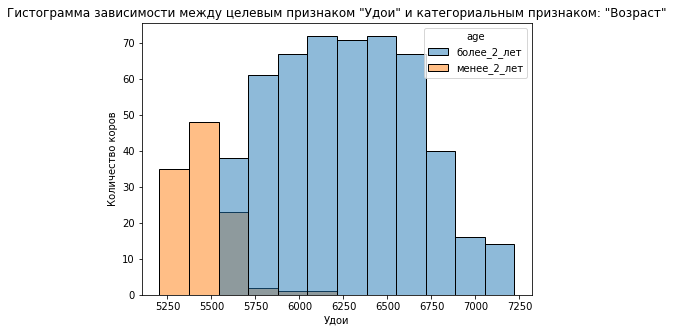

In [65]:
# построим гистограмму зависимости для целевого признака 'milk_yield' и категориального признака 'breed'
for i in range(len(category_group)):
    plt.figure(figsize = (7, 5))
    sns.histplot(data = data_ferma, x = 'milk_yield', hue = category_group[i])
    plt.title(f'Гистограмма зависимости между целевым признаком "Удои" и категориальным признаком: "{category_name[i]}"')
    plt.xlabel('Удои')
    plt.ylabel('Количество коров')

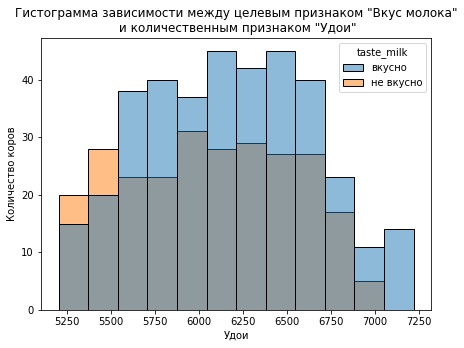

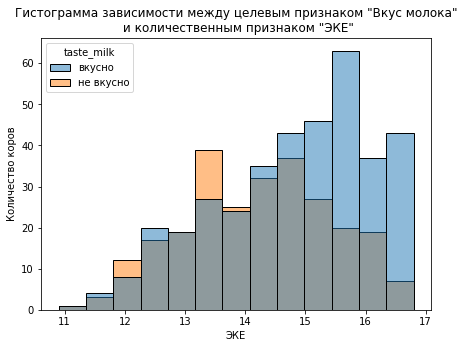

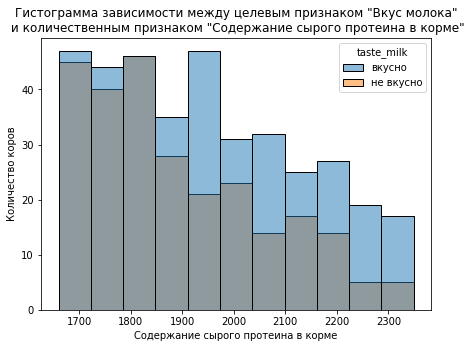

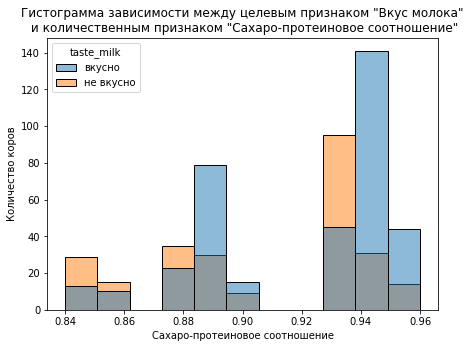

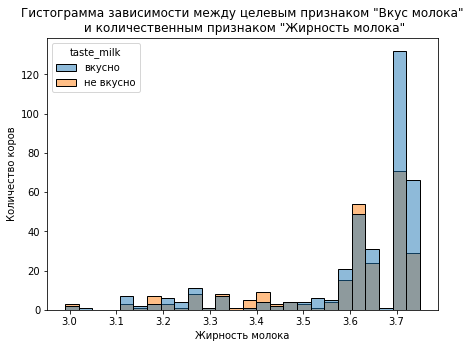

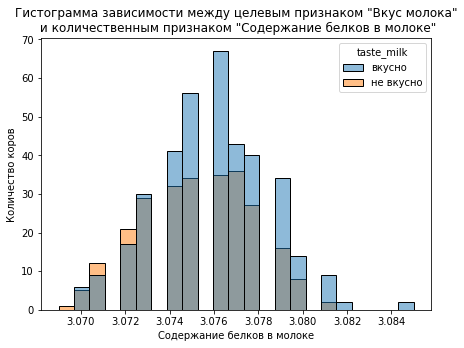

In [66]:
# зададим лист из количественных признаков 
# построим гистограммы зависимости для категориального целевого признака 'taste_milk' и количественных признаков
quan_group =['milk_yield', 'efu', 'raw_protein', 'sugar_protein_ratio', 'fat_%', 'protein_%']
quan_name = ['Удои', 'ЭКЕ', 'Содержание сырого протеина в корме', 'Сахаро-протеиновое соотношение', 'Жирность молока', 'Содержание белков в молоке']

for i in range(len(quan_group)):
    plt.figure(figsize = (7, 5))
    sns.histplot(data = data_ferma, x = quan_group[i], hue = 'taste_milk')
    plt.title(f'Гистограмма зависимости между целевым признаком "Вкус молока"\n и количественным признаком "{quan_name[i]}"')
    plt.xlabel(quan_name[i])
    plt.ylabel('Количество коров')

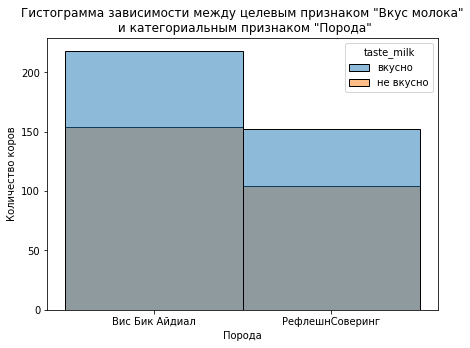

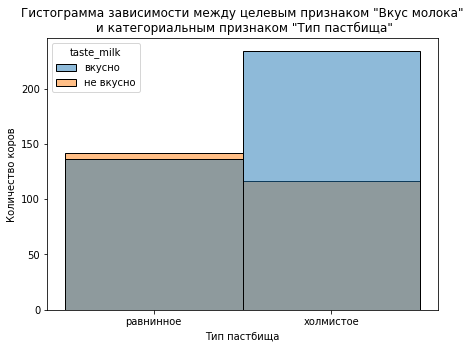

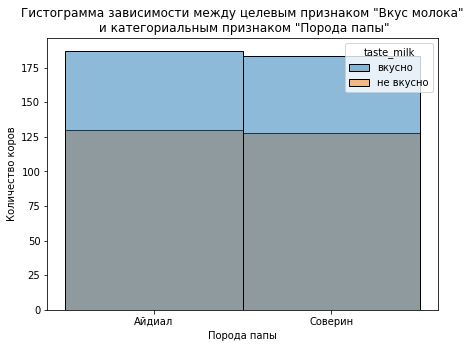

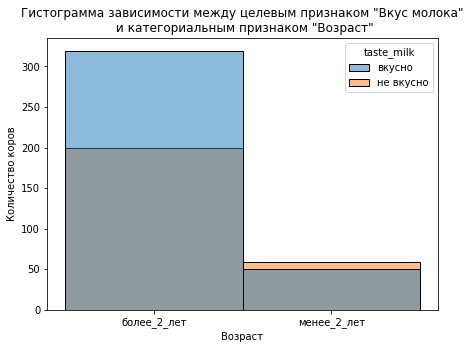

In [67]:
# зададим лист из категориальных признаков
# построим гистограммы зависимости для категориального целевого признака 'taste_milk' и категориальных признаков
cat_group = ['breed', 'pasture_type', 'dad_breed', 'age']
cat_name = ['Порода', 'Тип пастбища', 'Порода папы', 'Возраст']

for i in range(len(cat_group)):
    plt.figure(figsize = (7, 5))
    sns.histplot(data = data_ferma, x = cat_group[i], hue = 'taste_milk')
    plt.title(f'Гистограмма зависимости между целевым признаком "Вкус молока"\n и категориальным признаком "{cat_name[i]}"')
    plt.xlabel(cat_name[i])
    plt.ylabel('Количество коров')

Text(0, 0.5, 'Количество коров')

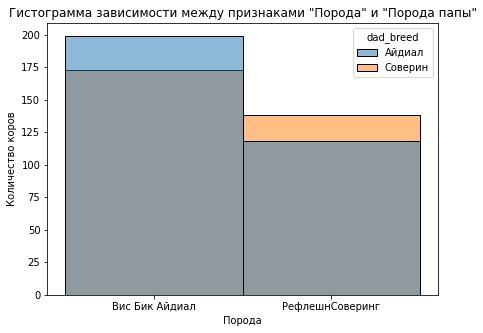

In [68]:
# построим гистограмму зависимости между признаками 'breed' и 'dad_breed'
plt.figure(figsize = (7, 5))
sns.histplot(data = data_ferma, x = 'breed', hue = 'dad_breed')
plt.title('Гистограмма зависимости между признаками "Порода" и "Порода папы"')
plt.xlabel('Порода')
plt.ylabel('Количество коров')

**Выводы:**

Между количесвтенными признаками (включая целевой количественный признак) были определены коэффициенты корреляции Спирмена. Мы использовали коэффициент Спирмена, т.к. для 3-х из 6-ти признаков распределение не является нормальным. Между целевым признаком `milk_yield` (удои) и признаками `efu` (ЭКЕ) и `sugar_protein_ratio` (сахаро-протеиновое соотношение) наблюдается высокая прямая корреляционная связь (коэффициенты 0.77 и 0.79), т.е. при увеличении значений этих признаков растёт и значение целевого признака. Между целевым признаком `milk_yield` и признаком `fat_%` (жирность молока) наблюдается заметная прямая корреляционная связь (коэффициент 0.69). Признак `raw_protein` (содержание сырого протеина) имеет умеренную прямую корреляционную связь с целевым признаком (коэффициент 0.44). А признак `protein_%` (содержание белков в молоке) не имеет корреляционной связи с целевым признаком `milk_yield` (коэффициент -0.01). Между количественными признаками `sugar_protein_ratio` и `efu`, а также `sugar_protein_ratio` и `fat_%` наблюдается сильная корреляционная связь (коэффициенты 0.70 и 0.74). Однако значения коэффициентов корреляции между указанными признаками меньше 0.9, поэтому между ними не наблюдается мультиколлениарности, и их олновременно можно использовать для построения модели линейной регрессии. 

Зависимость между признаками `milk_yield` и `raw_protein` близка к линейной, при том что корреляция между признаками умеренная. Между признаками `milk_yield` и `efu` прослеживается зависимость, близкая, но отличная от линейной. Между другими количественными признаками и целевым признаком не прослеживается линейной связи. В случаях, когда связь между целевым и входным признаком нелинейная следует с помощью дополнительных преобразований входных признаков исключить нелинейность, чтобы входные признаки были информативны для линейной регрессии.

Среди категориальных признаков наиболее сильную связь с объемов удоев (`milk_yield`) мы видим у признака `age` (возраст), по графикам диаграммы размаха чётко видно деление точек на два кластера. Коровы с возрастом менее 2-х лет не дают таких высоких удоев как коровы старше 2-х лет, какими бы не были другие количественные показатели. Также некоторая более слабая связь прослеживается между `milk_yield` и категориальными признаками `pasture_type` (тип пастибща) и `dad_breed`. На высоких показателях удоев заметно, что холмистый тип пастибща встречается чаще равнинного, и что порода папы "Айдиал" встречается гораздо чаще породы "Соверин". Практически не наблюдается никакой связи между категориальными признаками `breed` (порода) и `milk_taste` (вкус молока) и целевым признаком `milk_yield`.

По графикам мы наблюдаем, что целевой категориальный признак `milk_taste` имеет некоторую связь с количественными признаками `efu_new`, `protein_%`, `sugar_protein_ratio`, `fat_%`. Высоким значениям указанных признаков соответвует заметно больше коров с вкусным молоком, тогда как при низких показателях мы видим преобладание коров с невкусным молоком. Также вкус молока связан с такими категориальными признаками как тип пастбища (`pasture_type`) и возраст (`age`). Вкусное молоко чаще соответствует коровам старше 2 лет и холмистым пастбищам.

<div class="alert alert-success">
<b>👍 Успех:</b> Здесь тоже отлично получилось!
</div>

## Обучение модели линейной регрессии

1.	Подготовьте данные датасета ferma_main.csv и обучите на них первую модель LinearRegression. 

In [71]:
# отбираем признаки для первой модели линейной регрессии
X = data_ferma.drop(columns = 'milk_yield') 
y = data_ferma['milk_yield']

# разобъем данные на тренировочную и тестовую выборки
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

cat_col_names = ['pasture_type', 'dad_breed', 'age']
num_col_names = ['efu', 'raw_protein', 'sugar_protein_ratio', 'fat_%']

# кодируем категориальные признаки
encoder = OneHotEncoder(drop='first', sparse=False)

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

# масштабируем количественные признаки
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# создадим тренировочные и тестовые датафреймы из количественных и категориальных признаков и объединим их
X_train_ohe = pd.DataFrame(X_train_ohe, columns = encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns = encoder_col_names)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = num_col_names)

X_train = X_train_ohe.merge(X_train_scaled, left_index=True, right_index=True)
X_test = X_test_ohe.merge(X_test_scaled, left_index=True, right_index=True)

# обучим модель линейной регрессии на подготовленных данных
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions_1 = model_lr.predict(X_test)

# oценим качество модели на тестовой выборке
r2 = r2_score(y_test, predictions_1)
r2

0.7841982438619746

Среднее значение остатков -23.16294764751861


Text(0, 0.5, 'Остатки')

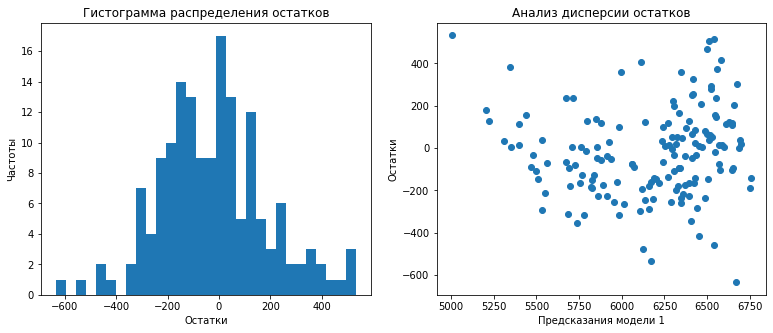

In [72]:
residuals = y_test - predictions_1 # вычислим остатки между истинными значениями и предсказанными моделью
print('Среднее значение остатков', residuals.mean()) # среднее значение остатков

# построим гистограмму распределения остаков и диаграмму рассеяния по значениям остатков и показателю удоя
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
axes[0].hist(residuals, bins=30)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')
axes[0].set_ylabel('Частоты')

axes[1].scatter(x = predictions_1, y = residuals)
axes[1].set_title('Анализ дисперсии остатков')
axes[1].set_xlabel('Предсказания модели 1')
axes[1].set_ylabel('Остатки')

**Выводы по первой модели линейной регрессии:**
Для первой модели простой линейной регресии мы прежде всего отобрали признаки, необходимые для построения модели, которая позволяет прогнозировать целевой признак - `удои`. Из количественных признаков мы выбрали `ЭКЕ`, `содержание сырого протеина в корме`, `сахаро-протеиновое соотношение` и `жирность молока`. Мы не использовали количественный признак `содержание белков в молоке`, поскольку коэффициент корреляции Спирмена между этим признаком и целевым признаком составляет всего -0.01. Из категориальных мы выбрали признаки `тип пастбища`, `порода папы`, `возраст`. Мы не включили в модель категориальные признаки `id`, `порода`, `вкус молока`. Идентификационный номер уникален для каждой коровы, и таким образом никак не может быть связан с целевым признаком. Вкус молока является целевым признаком для следующего этапа исследования и как показывают графики (рассеяния и гистограммы) зависит от части других признаков (количественных и категориальных), но не имеет заметной связи с целевым признаком `удои`. Порода коровы, как показали графики, не имеет сильной корреляции с удоями, но явно коррелирует с породой папы коровы. В свою очередь порода папы имеет более сильную корреляцию с целевым признаком по сравнению с породой коровы, что хорошо видно по диаграмме рассеяния и по гистограмме. Поэтому мы оставили для модели только породу папы.

Коэффициент детерминации R² для первой получившейся модели равен 0.784

Мы построили гистограмму распределения остатков и график рассеяния для визуализации дисперсии остатков. Гистограмма остатков показывает распределение, близкое к нормальному. Однако среднее значение остатков смещено влево (значение -23.2). Это означает, что модель больше склонна давать завышенные (выше истинных) прогнозные значения. Дисперсия остатков показывает незначительные колебания. Заметно, что при прогнозных значениях удоев свыше 6100, дисперсия остатков начинает увеличиваться. Поскольку у остатков нарушается свойство постоянства дисперсии, то модель в работе использовать нежелательно, её нужно улучшить, для чего мы проведем дополнительные исследования.


<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

2.	Подготовьте данные с учётом связи входных признаков с целевым и обучите на них вторую модель LinearRegression

In [73]:
# создадим и затем применим функцию для категоризации значений сахаро-протеинового соотношения
def spr_category(spr):
    if spr < 0.91:
        return 0
    elif spr >= 0.91:
        return 1

data_ferma['sugar_protein_ratio_bin'] = data_ferma['sugar_protein_ratio'].apply(spr_category)

# для устранения нелинейности добавим новый признак - ЭКЕ, возведенное в квадрат
data_ferma['efu_new'] = data_ferma['efu']**2

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [75]:
# отбираем признаки для второй модели линейной регрессии
X = data_ferma.drop(columns = 'milk_yield') 
y = data_ferma['milk_yield']

# разобъем данные на тренировочную и тестовую выборки
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

cat_col_names = ['pasture_type', 'dad_breed', 'age', 'sugar_protein_ratio_bin']
num_col_names = ['efu_new', 'raw_protein', 'fat_%']

# кодируем категориальные признаки
encoder = OneHotEncoder(drop='first', sparse=False)

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

# масштабируем количественные признаки
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# создадим тренировочные и тестовые датафреймы из количественных и категориальных признаков и объединим их
X_train_ohe = pd.DataFrame(X_train_ohe, columns = encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns = encoder_col_names)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = num_col_names)

X_train = X_train_ohe.merge(X_train_scaled, left_index=True, right_index=True)
X_test = X_test_ohe.merge(X_test_scaled, left_index=True, right_index=True)

# обучим модель линейной регрессии на подготовленных данных
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions_2 = model_lr.predict(X_test)

# oценим качество модели на тестовой выборке
r2 = r2_score(y_test, predictions_2)
r2

0.8165458072190872

In [ ]:
residuals_2 = y_test - predictions_2 # вычислим остатки между истинными значениями и предсказанными моделью
print('Среднее значение остатков', residuals_2.mean()) # среднее значение остатков 

# построим гистограмму распределения остаков и диаграмму рассеяния по значениям остатков и показателю удоя
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
axes[0].hist(residuals_2, bins=30)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')
axes[0].set_ylabel('Частоты')

axes[1].scatter(x = predictions_2, y = residuals_2)
axes[1].set_title('Анализ дисперсии остатков')
axes[1].set_xlabel('Предсказания модели 2')
axes[1].set_ylabel('Остатки')

**Выводы по второй модели линейной регрессии:**
Для второй модели простой линейной регресии по сравнению с первой мы постарались учесть характер зависимости признаков с целевым признаком. Для тех случаев, где прослеживается нелинейная связь, мы выполнили преобразования признаков. Так мы обнаружили, что СПО и Удой связаны нелинейно. На диаграмме рассеяния наблюдения сгруппированы в два кластера, поэтому мы преобразовали СПО в категориальный бинарный признак, выбрав значение, по которому проходит граница между двумя группами. Для построения модели мы использовали этот преобразованный признак. Кроме того мы заметили, что ЭКЕ и Удой связаны нелинейно. Нелинейность между ними можно исключить, введя новый признак ЭКЕ в квадрате, именно такой новый признак мы использовали для построения модели. Остальные признаки, использованные в первой модели, мы оставили без изменений. Количественне признаки:  преобразованное `ЭКЕ`, `содержание сырого протеина в корме` и `жирность молока`. Категориальные признаки: `тип пастбища`, `порода папы`, `возраст`, `сахаро-протеиновое соотношение`, преобразованное в бинарный признак. Затем мы повторили все те же шаги, что делали для построения первой модели.

Коэффициент детерминации R² для второй получившейся модели равен 0.817, что на 0.033 больше чем для первой модели и соответственно ближе к 1. Это значит, что предсказания модели точнее по сравнению с первой моделью.

Мы построили гистограмму распределения остатков и график рассеяния для визуализации дисперсии остатков. Гистограмма остатков показывает распределение, близкое к нормальному. Среднее значение остатков как и в случае первой модели смещено влево (значение -21.7), правда это значение уменьшилось в абсолютном выражении. Смещение влево означает, что модель больше склонна давать завышенные (выше истинных) прогнозные значения. Кроме того, мы наблюдаем на гистограмме один явный выброс со значением ниже -600. Дисперсия остатков показывает незначительные колебания. По-прежнему как и в случае первой модели при высоких значениях удовев дисперсия увеличивается. Однака граница, после которой наблюдается увеличение, сместилась от 6100 к 6400. Поскольку у остатков нарушается свойство постоянства дисперсии, то модель в работе использовать нежелательно, её нужно улучшить, для чего будут проведены дополнительные исследования.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно! Метрика стала лучше
</div>

3.	Добавьте в данные новый признак и обучите на них третью модель LinearRegression. 

In [76]:
data_ferma = data_ferma.merge(ferma_dad, on = 'id') # добавим новый признак 'dad_name' из датафрейма 'ferma_dad'
data_ferma.head()

,id,milk_yield,efu,raw_protein,sugar_protein_ratio,breed,pasture_type,dad_breed,fat_%,protein_%,taste_milk,age,sugar_protein_ratio_bin,efu_new,dad_name
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84,Барин


Text(0, 0.5, 'Количество коров')

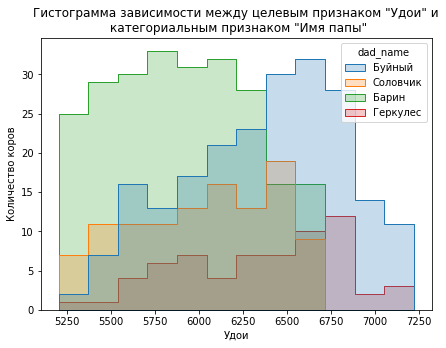

In [77]:
# посмотрим взаимосвязь между значениями целевого показателя 'удои' и именами папы 
plt.figure(figsize = (7, 5))
sns.histplot(data = data_ferma, x = 'milk_yield', hue = 'dad_name', element = 'step')
plt.title('Гистограмма зависимости между целевым признаком "Удои" и\n категориальным признаком "Имя папы"')
plt.xlabel('Удои')
plt.ylabel('Количество коров')

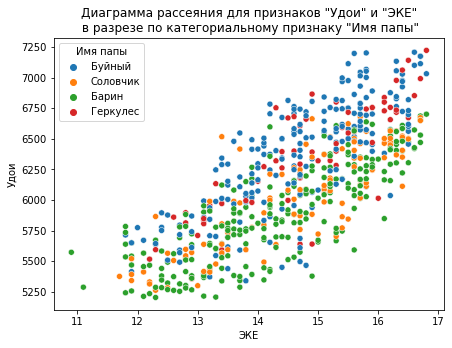

In [78]:
# посмотрим взаимосвязь между значениями целевого показателя 'удои' и  'эке' в разрезе по категории 'имя папы' 
plt.figure(figsize = (7, 5))
sns.scatterplot(data = data_ferma, x='efu', y = 'milk_yield', hue = 'dad_name')
plt.title('Диаграмма рассеяния для признаков "Удои" и "ЭКЕ"\n в разрезе по категориальному признаку "Имя папы"')
plt.xlabel('ЭКЕ')
plt.ylabel('Удои')
plt.legend(title = 'Имя папы')

In [79]:
# отбираем признаки для третьей модели линейной регрессии
X = data_ferma.drop(columns = 'milk_yield') 
y = data_ferma['milk_yield']

# разобъем данные на тренировочную и тестовую выборки
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

cat_col_names = ['pasture_type', 'dad_breed', 'age', 'sugar_protein_ratio_bin', 'dad_name']
num_col_names = ['efu_new', 'raw_protein', 'fat_%']

# кодируем категориальные признаки
encoder = OneHotEncoder(drop='first', sparse=False)

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

# масштабируем количественные признаки
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# создадим тренировочные и тестовые датафреймы из количественных и категориальных признаков и объединим их
X_train_ohe = pd.DataFrame(X_train_ohe, columns = encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns = encoder_col_names)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = num_col_names)

X_train = X_train_ohe.merge(X_train_scaled, left_index=True, right_index=True)
X_test = X_test_ohe.merge(X_test_scaled, left_index=True, right_index=True)

# обучим модель линейной регрессии на подготовленных данных
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions_3 = model_lr.predict(X_test)

# oценим качество модели на тестовой выборке
r2 = r2_score(y_test, predictions_3)
r2

0.820656729553334

Среднее значение остатков -12.1135750580135


Text(0, 0.5, 'Остатки')

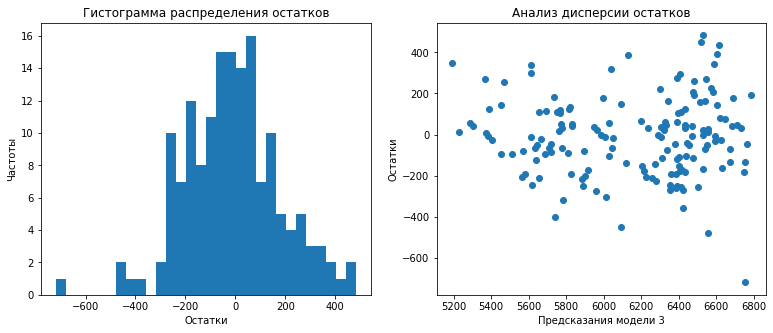

In [80]:
residuals_3 = y_test - predictions_3 # вычислим остатки между истинными значениями и предсказанными моделью
print('Среднее значение остатков', residuals_3.mean()) # среднее значение остатков 

# построим гистограмму распределения остаков и диаграмму рассеяния по значениям остатков и показателю удоя
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
axes[0].hist(residuals_3, bins=30)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')
axes[0].set_ylabel('Частоты')

axes[1].scatter(x = predictions_3, y = residuals_3)
axes[1].set_title('Анализ дисперсии остатков')
axes[1].set_xlabel('Предсказания модели 3')
axes[1].set_ylabel('Остатки')

**Выводы по третьей модели линейной регрессии:**
Для третьей модели простой линейной регресии по сравнению со второй мы ввели один дополнительный категориальный признак `имя папы`, который подтянули из второго датафрейма с именами пап коров по ключу - значению `id`. Таким образом для модели мы взяли следующие  количественне признаки: `ЭКЕ` в квадрате, `содержание сырого протеина в корме` и `жирность молока`. А в качестве категориальных признаков отобрали: `тип пастбища`, `порода папы`, `возраст`, `сахаро-протеиновое соотношение`, преобразованное в бинарный признак, и `имя папы`. Затем мы повторили все те же шаги, что делали для построения первой и второй модели.

Коэффициент детерминации R² для третьей получившейся модели равен 0.821, что на 0.004 больше чем для второй модели и на 0.037 больше R² для первой модели. Таким образом ошибка R² ближе к 1, по сравнению с первыми двумя моделями. Это значит, что предсказания модели точнее по сравнению с рассмотренными ранее моделями.

Мы построили гистограмму распределения остатков и диаграмму рассеяния для визуализации дисперсии остатков. Гистограмма остатков показывает распределение, близкое к нормальному. Среднее значение остатков как и в случае двух первых моделей смещено влево (значение -12.1), правда это значение примерно в два раза уменьшилось в абсолютном выражении. Смещение влево означает, что модель больше склонна давать завышенные (выше истинных) прогнозные значения. Кроме того, мы также как и во второй модели наблюдаем на гистограмме один явный выброс со значением ниже -600. Дисперсия остатков для третьей модели не имеет заметных колебаний, можно считать, что свойство постоянство дисперсии остатков не нарушено. Однако на диаграмме рассения также заметен один явный выброс при высоком значении целевого показателя. Такую модель можно использовать для дальнейшей работы, но в то же время очевидно, что её можно ещё улучшить.


<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

4.	Сравните качество трёх моделей линейной регрессии, сопоставьте их R² и остатки.

**Выводы по R² и остаткам 3-х рассмотренных моделей:**
Мы наблюдаем поэтапное улучшение показателей при рассмотрении трёх разных моделей линейной регрессии. R² для первой модели 0.784, для второй - 0.816, для третьей - 0.821. Таким образом, ошибка R² в третьей моделе стала ближе к 1, по сравнению с первыми двумя моделями, т.е. предсказания модели точнее по сравнению с рассмотренными ранее моделями. По гистограммам распределения остатков мы видим, что график для третьей модели стал ближе к нормальному, смещение влево стало заметно меньше, т.е. разница между истинными значениями целевого показателя и предсказанными значениями стала ближе к 0. Однако, при этом модель даёт один явный выброс, и это значит что модель ещё можно улучшить. В отличие от первых двух моделей мы видим, что на третьей моделе наконец наблюдается постоянство дисперсии остатков, что означает, что модель работает лучше первых двух. Можно сделать вывод, что устранение нелинейности между признаками и добавление нового признака `имя папы` способствовало улучшению прогнозной модели.


5.	Оцените качество каждой модели по трём метрикам: MSE, MAE, RMSE.

In [81]:
# рассчитаем метрики качества для первой модели
mse_1 = mean_squared_error(y_test, predictions_1)
rmse_1 = mean_squared_error(y_test, predictions_1, squared=False)
mae_1 = mean_absolute_error(y_test, predictions_1)

# рассчитаем метрики качества для второй модели
mse_2 = mean_squared_error(y_test, predictions_2)
rmse_2 = mean_squared_error(y_test, predictions_2, squared=False)
mae_2 = mean_absolute_error(y_test, predictions_2)

# рассчитаем метрики качества для третьей модели
mse_3 = mean_squared_error(y_test, predictions_3)
rmse_3 = mean_squared_error(y_test, predictions_3, squared=False)
mae_3 = mean_absolute_error(y_test, predictions_3)

# выведем метрики качества по всем трём моделям
print(f'Метрики качества первой модели:\n среднеквадратичная ошибка (mse): {mse_1:.2f}\n \
корень среднеквадратичной ошибки (rmse): {rmse_1:.2f}\n средняя абсолютная ошибка (mae): {mae_1:.2f}\n')
print(f'Метрики качества второй модели:\n среднеквадратичная ошибка (mse): {mse_2:.2f}\n \
корень среднеквадратичной ошибки (rmse): {rmse_2:.2f}\n средняя абсолютная ошибка (mae): {mae_2:.2f}\n')
print(f'Метрики качества третьей модели:\n среднеквадратичная ошибка (mse): {mse_3:.2f}\n \
корень среднеквадратичной ошибки (rmse): {rmse_3:.2f}\n средняя абсолютная ошибка (mae): {mae_3:.2f}\n')

Метрики качества первой модели:
 среднеквадратичная ошибка (mse): 43929.68
 корень среднеквадратичной ошибки (rmse): 209.59
 средняя абсолютная ошибка (mae): 163.62

Метрики качества второй модели:
 среднеквадратичная ошибка (mse): 37344.85
 корень среднеквадратичной ошибки (rmse): 193.25
 средняя абсолютная ошибка (mae): 148.38

Метрики качества третьей модели:
 среднеквадратичная ошибка (mse): 36508.01
 корень среднеквадратичной ошибки (rmse): 191.07
 средняя абсолютная ошибка (mae): 147.27



**Вывод:** Мы видим, что по всем трём метрикам оценки качества модели лучшей является третья модель. Для третьей модели каждай из трёх метрик (mse, rmse, mae) наименьшая по сравнению с первой и второй моделями.

<div class="alert alert-success">
<b>👍 Успех:</b> Лучшая модель выбрана!
</div>

In [82]:
# посчитаем доверительный интервал прогноза лучшей модели. 
dif_value = abs(y_test - predictions_3)
quantile = dif_value.quantile(q=0.5)
print('Значение доверительного интервала для лучшей модели (номер 3):', round(quantile, 2))

Значение доверительного интервала для лучшей модели (номер 3): 120.32


6.	С помощью лучшей модели спрогнозируйте удой коров, которых фермер хочет купить. 

In [83]:
# добавим в датафрейм по коровам для покупки расчётные значения ЭКЕ, сырого протеина в корме и сахаро-протеинового соотношения
cow_buy['efu'] = data_ferma['efu'].mean()*1.05
cow_buy['raw_protein'] = data_ferma['raw_protein'].mean()*1.05
cow_buy['sugar_protein_ratio'] = data_ferma['sugar_protein_ratio'].mean()*1.05
# добавим столбец со значениями ЭКЕ в квадрате
cow_buy['efu_new'] = cow_buy['efu']**2

In [84]:
# приведем в соотвествие столбцы в датафреймах, выведем первые строки датафрейма 'cow_buy'
cow_buy['sugar_protein_ratio_bin'] = cow_buy['sugar_protein_ratio'].apply(spr_category)
cow_buy.head()

,breed,pasture_type,dad_breed,dad_name,fat_%,protein_%,age,efu,raw_protein,sugar_protein_ratio,efu_new,sugar_protein_ratio_bin
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,233.361138,1
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,233.361138,1


<div class="alert alert-danger">
<b>😔 Необходимо исправить:</b> 'sugar_protein_ratio_bin' нужно получить тем же способом, как и для тренировочного датасета
</div>

  <div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Исправил </div>

In [85]:
# задаём выборку для прогноза
X_pred = cow_buy

# кодируем категориальные признаки выборки для прогноза 
X_pred_ohe = encoder.transform(X_pred[cat_col_names])

encoder_col_names = encoder.get_feature_names()

# масштабируем количественные признаки выборки
X_pred_scaled = scaler.transform(X_pred[num_col_names])

# создадим датафреймы из количественных и категориальных признаков и объединим их
X_pred_ohe = pd.DataFrame(X_pred_ohe, columns = encoder_col_names)
X_pred_scaled = pd.DataFrame(X_pred_scaled, columns = num_col_names)

X_pred = X_pred_ohe.merge(X_pred_scaled, left_index=True, right_index=True)

# построим прогноз по удою коров, которых хочет купить фермер
y_pred_final = model_lr.predict(X_pred)
print('Прогноз удоев коров, которых хочет купить фермер:\n\n', np.around(y_pred_final, decimals=2))

Прогноз удоев коров, которых хочет купить фермер:

 [6595.53 6362.19 6248.43 6530.28 6522.03 6408.7  6595.53 6546.26 6248.43
 6352.45 6355.57 6607.35 6616.36 6093.42 6248.43 6530.28 6355.57 6437.85
 6498.37 6522.03]


**Выводы:**

После того как мы получили оптимальную модель линейной регресии для пронозирования удоев молока, мы применили обученную модель к новой выборке из 20 коров, которых хочет купить фермер. Прежде чем сделать прогноз удоев молока для новой выборки, мы привели датафрейм с 20 коровами, предложенными фермеру, в соответствие с датафреймом, по которому проводили обучение модели. Мы добавили все недостающие столбцы в датафрейм. Значения признаков ЭКЕ, Сырой протеин и СПО мы посчитали как средние значения соответсвующих признаков из датафрейма по коровам на ферме, увеличенные на 5%. После добавления новых столбцов мы убедились, что столбцы в обоих датафреймах имеют одинаковые названия. Затем мы кодировали категориальные признаки по 20 коровам с помощью метода One-Hot-Encoding и в результате получили новые столбцы. После этого мы масштабировали количественные признаки методом стандартизации (StandardScaler). И в завершение мы создали датафреймы из категориальных и количественных признаков после их преобразований и объединили эти два датафрейма в один, который использовали для получения прогнозных значений по удоям. В результате прогноза мы получили, что по всем 20 коровам прогнозные значения превышают 6000.

<div class="alert alert-success">
<b>👍 Успех:</b> Отлично! Все коровы будут давать нужное количество молока!
</div>

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> У тебя уже есть обученная модель и кодировщики, нужно использовать ее, а не делать все заново, и дописать вывод по разделу</s>
</div>

  <div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Спасибо за замечание, сходу не разобрался как применить уже обученную модель. Исправил. </div>

## Обучение модели логистической регрессии

1.	Подготовьте данные датасета ferma_main.csv и обучите на них модель LogisticRegression. 

Text(0, 0.5, 'Количество коров')

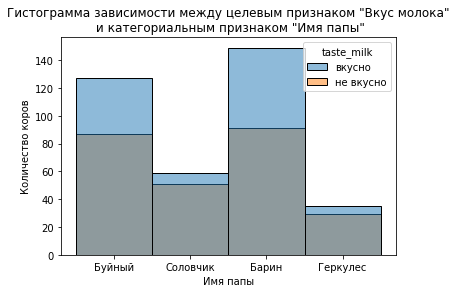

In [86]:
# посмотрим на гистограмме связь имени папы со вкусом молока
plt.figure(figsize = (6, 4))
sns.histplot(data = data_ferma, x = 'dad_name', hue = 'taste_milk')
plt.title('Гистограмма зависимости между целевым признаком "Вкус молока"\n и категориальным признаком "Имя папы"')
plt.xlabel('Имя папы')
plt.ylabel('Количество коров')

In [87]:
# создадим и затем применим функцию для категоризации вкуса молока как бинарного признака со значениями 1 и 0
def taste_milk_category(taste):
    if taste == 'вкусно':
        return 1
    elif taste == 'не вкусно':
        return 0

data_ferma['taste_milk_bin'] = data_ferma['taste_milk'].apply(taste_milk_category)

<div class="alert alert-danger">
    <s><b>😔 Необходимо исправить:</b> Категоризировать жирность молока не нужно</s>
</div>

  <div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Убрал категоризацию молока </div>

In [88]:
# отбираем признаки для модели логистической регрессии
X = data_ferma.drop(columns = 'taste_milk_bin') 
y = data_ferma['taste_milk_bin']

# разобъем данные на тренировочную и тестовую выборки
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

cat_col_names = ['pasture_type', 'age', 'dad_name', 'sugar_protein_ratio_bin']
num_col_names = ['efu', 'protein_%', 'fat_%', 'sugar_protein_ratio']

# кодируем категориальные признаки
encoder = OneHotEncoder(drop='first', sparse=False)

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

# масштабируем количественные признаки
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# создадим тренировочные и тестовые датафреймы из количественных и категориальных признаков и объединим их
X_train_ohe = pd.DataFrame(X_train_ohe, columns = encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns = encoder_col_names)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = num_col_names)

X_train = X_train_ohe.merge(X_train_scaled, left_index=True, right_index=True)
X_test = X_test_ohe.merge(X_test_scaled, left_index=True, right_index=True)

# обучим модель логистической регрессии на подготовленных данных
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# оценим качество модели на тестовой выборке метриками accuracy, recall, precision
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f'Значение метрики accuracy (доля точных ответов): {accuracy:.3f}\n\
Значение метрики recall (полнота): {recall:.3f}\n\
Значение метрики precision (точность): {precision:.3f}')

Значение метрики accuracy (доля точных ответов): 0.643
Значение метрики recall (полнота): 0.886
Значение метрики precision (точность): 0.629


Text(0.5, 15.0, 'Предсказанное значение')

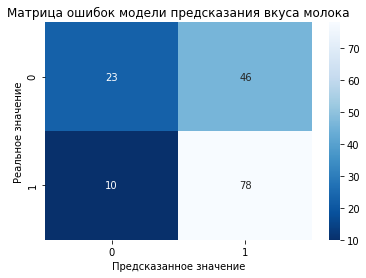

In [89]:
# построим матрицу ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues_r')
plt.title('Матрица ошибок модели предсказания вкуса молока')
plt.ylabel('Реальное значение')
plt.xlabel('Предсказанное значение')

2.	Проанализируйте модель логистической регрессии. 

В нашей задаче при покупке коров наиболее критичная ошибкой является ошибка первого рода или иными словами ложноположительная ошибка (`False Positive`). В таком случае для верного решения задачи нам важно минимизировать возможность неправильно выбрать коров с вкусным молоком, т.е. отобрать для покупки таких коров, молоко которых на самом деле будет невкусным. При этом для нас не так критично, если часть коров с вкусным молоком будут определены прогнозной моделью как коровы с невкусным молоком. Если соотнести наш вывод с метриками, то выходит, что нам нужно выбрать для построения прогнноза метрику `precision`. Нам нужно подобрать такое пороговое значение принадлежности к классам, при котором число ошибок типа `False Positive` будет равно нулю, и тогда в свою очередь метрика `precision` будет равна 1.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [90]:
# создаем таблицу со столбцом предсказаний вероятности, значение в котором сравнивается с порогом вероятности, заданном  модели
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba),
                    columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

data.head()

,y_valid,y_proba
4,1,0.834918
17,1,0.833950
114,1,0.829089
64,1,0.827207
136,1,0.816340


In [91]:
# задаем на отрезке от 0.1 до 1 100 пороговых значений и для каждого порогового значение считаем метрики точности модели и значения True Positive, False Positive
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 100, endpoint=False)]

columns = []
precision_thr = []
recall_thr = []
true_positive = []
false_positive = []
cm_thr = []

for i in thresholds:
    columns.append(str(i))
    data['y_pred_'] = data['y_proba'].apply(lambda x: 1 if x>= i else 0)
    precision = round(precision_score(data['y_valid'], data['y_pred_'], zero_division=0), 3)
    precision_thr.append(precision)
    recall = round(recall_score(data['y_valid'], data['y_pred_']), 3)
    recall_thr.append(recall)
    data['tp'] = data.apply(lambda x: 1 if (x['y_valid']== 1) & (x['y_pred_']==1) else 0, axis = 1)
    data['fp'] = data.apply(lambda x: 1 if (x['y_valid']== 0) & (x['y_pred_']==1) else 0, axis = 1)    
    true_positive.append(data['tp'].sum())
    false_positive.append(data['fp'].sum())
    cm = confusion_matrix(data['y_valid'], data['y_pred_'])
    cm_thr.append(cm)

# создаем датафрейм со значениями порога, precision, recall, True Positive, False Positive и подберем пороговое значение при котором значение False Positive равно 0
thresholds_select = pd.DataFrame(zip(columns, precision_thr, recall_thr, true_positive, false_positive), columns = ['Порог', 'precision', 'recall', 'True Positive', 'False Positive'])
thresholds_select.tail(30)

,Порог,precision,recall,True Positive,False Positive
70,0.73,0.868,0.375,33,5
71,0.74,0.912,0.352,31,3
72,0.75,0.933,0.318,28,2
73,0.76,0.958,0.261,23,1
74,0.77,1.000,0.216,19,0
75,0.78,1.000,0.193,17,0
76,0.78,1.000,0.193,17,0
77,0.79,1.000,0.170,15,0
78,0.8,1.000,0.125,11,0
79,0.81,1.000,0.068,6,0


Text(0.5, 15.0, 'Предсказанное значение')

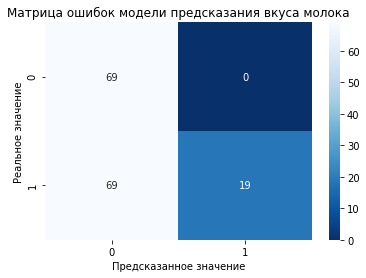

In [92]:
# посмотрим матрицу ошибок, посчитаннаую ранее, для указанного порогового значения (определяем нужную матрицу по индексу 74)
sns.heatmap(cm_thr[74], annot=True, cmap='Blues_r')
plt.title('Матрица ошибок модели предсказания вкуса молока')
plt.ylabel('Реальное значение')
plt.xlabel('Предсказанное значение')

**Выводы**:

Значения метрик для выбранной модели логистической регрегрсии при значении порога по умолчанию 0.5: 

precision - 0.629

recall - 0.886

Мы определили по построенной таблице с пороговыми значениями, что при значении порога 0.77 количество ошибок первого рода (False Positive) равно нулю, а при пороге 0.76 кол-во ошибок равно 1. В таблице отображены значения при пошаговом увеличении порога от 0.1 до 0.99. Поэтому следует выбрать 0.77 в качестве значения порога принадлежности к классам, при котором критическая ошибка равна нулю.   

Значения метрик для выбранной модели логистической регрегрсии при выборе значения порога 0.77:

precision - 1.0

recall - 0.216

При выбранном пороговом значении на тестовой выборке к классу один было отнесено 19 объектов (в нашем случае коров) из всего 88 объектов класса 1 в тестовой выборке. 

Далее с помощью обученной выборки, применив оптимальное пороговое значения определения класса 1 (вкусное молоко), мы сделаем прогноз вкуса молока для коров, предложенных к покупке для фермы.


<div class="alert alert-success">
<b>👍 Успех:</b> Нужные порог найден!
</div>

3.	С помощью обученной модели спрогнозируйте вкус молока коров, которых фермер хочет купить. 

In [95]:
# добавляем категориальные бинарные признаки в датасет по коровам для покупки
X_pred = cow_buy


# кодируем категориальные признаки
X_pred_ohe = encoder.transform(X_pred[cat_col_names])

encoder_col_names = encoder.get_feature_names()

# масштабируем количественные признаки
X_pred_scaled = scaler.transform(X_pred[num_col_names])

# создадим тренировочные и тестовые датафреймы из количественных и категориальных признаков и объединим их
X_pred_ohe = pd.DataFrame(X_pred_ohe, columns = encoder_col_names)
X_pred_scaled = pd.DataFrame(X_pred_scaled, columns = num_col_names)

X_pred = X_pred_ohe.merge(X_pred_scaled, left_index=True, right_index=True)

# обучим модель логистической регрессии на подготовленных данных
y_proba_taste = (clf.predict_proba(X_pred)[:,1] >= 0.77).astype(int)
y_proba = clf.predict_proba(X_pred)[:,1]

print('Прогноз вкусности молока коров, которых фермер хочет купить, где 1 - вкусно, 0 - не вкусно:\n\n', y_proba_taste)

Прогноз вкусности молока коров, которых фермер хочет купить, где 1 - вкусно, 0 - не вкусно:

 [1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0]


**Выводы:**

После того как мы получили оптимальную модель логистической регресии для пронозирования вкуса молока, мы применили обученную модель к новой выборке из 20 коров, которых хочет купить фермер. Ещё на этапе построения прогноза по удоям мы добавили в датафрейм с 20 коровами все необходимые столбцы и убедились, что в столбце есть те же столбцы, что и в датафрейме для обучения модели. Поэтому мы сразу перешли к кодированию категориальных признаков по 20 коровам с помощью метода One-Hot-Encoding и в результате получили новые столбцы. После этого мы масштабировали количественные признаки методом стандартизации (StandardScaler). В завершение мы создали датафреймы из категориальных и количественных признаков после их преобразований и объединили их в один датафрейм, который использовали для получения прогнозных значений вкуса молока. В результате прогноза мы получили, что при выбранном на предыдущем этапе оптимальном (для минимизации ошибок) пороговом значении вероятности 0.77 модель отбирает 7 из 20 коров как коров с вкусным молоком.

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Здесь у тебя тоже уже есть обученные кодировщик, скайлер и модель, нужно использовать их и ничего не обучать заново</s>
</div>

  <div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Исправил. </div>

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

## Итоговые выводы

In [96]:
# добавим прогнозы вкуса молока и удоя коров в датафрейм с коровами, окупку которых рассматривает фермер, а также вероятность того, что у коровы вкусное молоко
cow_buy_predicted = cow_buy.drop(columns = ['efu_new', 'sugar_protein_ratio_bin'])
predict = pd.DataFrame(zip(y_pred_final, y_proba_taste, y_proba),
                    columns = ['milk_yield_predict', 'taste_milk_predict', 'probability_tasty_milk'])

cow_buy_predicted = np.around(cow_buy_predicted.merge(predict, left_index=True, right_index=True), decimals=2)
cow_buy_predicted # выведем таблицу с добавленными прогнозными значениями и вероятностью того, что молоко у коровы вкусное

,breed,pasture_type,dad_breed,dad_name,fat_%,protein_%,age,efu,raw_protein,sugar_protein_ratio,milk_yield_predict,taste_milk_predict,probability_tasty_milk
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.08,более_2_лет,15.28,2019.95,0.96,6595.53,1,0.86
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.08,менее_2_лет,15.28,2019.95,0.96,6362.19,1,0.81
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.07,более_2_лет,15.28,2019.95,0.96,6248.43,0,0.74
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.06,более_2_лет,15.28,2019.95,0.96,6530.28,0,0.64
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.07,более_2_лет,15.28,2019.95,0.96,6522.03,0,0.72
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.05,менее_2_лет,15.28,2019.95,0.96,6408.70,0,0.24
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.08,более_2_лет,15.28,2019.95,0.96,6595.53,1,0.86
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.08,более_2_лет,15.28,2019.95,0.96,6546.26,1,0.81
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.07,более_2_лет,15.28,2019.95,0.96,6248.43,0,0.74
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.08,менее_2_лет,15.28,2019.95,0.96,6352.45,1,0.88


<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Довверительный интервал работает в обе стороны, здесь не нужно его использовать, достаточно сравнить с 6000. Нужно вывести полную таблицу с прогнозом по всем 20 коровам, стоит добавить столбец с вероятностью вкусного молока, что бы фермер сам принял решение, каких коров ему точно покупать, а на каких поросить скидку</s>
</div>

  <div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Спасибо за замечание! Разобрался, добавил вероятность, вывел таблицу, написал выводы с учётом полученных результатов. </div>

Результатом проделанной работы является выбор оптимальной модели линейной регрессии, которая позволяет сделать прогноз удоев молока для списка коров, предложенных для покупки фермеру, а также выбор оптимальной модели логистической регрессии, которая делает отбор коров с вкусным молоком из предложенного списка. Мы вывели таблицу по всем коровам, которые предлагаются для покупки фермеру, и добавили для каждой коровы прогнозные значения удоя молока (столбец `milk_yield_predict`), проноз вкусности молока (столбец `taste_milk_predict`), в котором 1 означает вкусное молоко, и вероятность того, что молоко будет вкусным (столбец `probability_tasty_milk`). Указанные три добавленных столбца демонстируют работу двух прогнозных моделей, подобранных в ходе работы. Мы видим, что все 20 коров имеют удой свыше 6000 кг в год, т.е. удовлетворяют запросу фермера. В результате прогноза вкуса молока модель отбирает всего 7 коров из 20 с вкусным молоком. Такой результат прогноза по вкусу молока связан с тем, что мы подобрали такой порог определения классов, при котором метрика ошибки `precision` равна 1, т.е. максимальная из возможных, а значение ошибки `False Positive` сведено к минимуму, т.е. равно 0 по нашей пронозной моделе. Таким образом, получается, что фермер может купить только 7 коров из 20 коров  с минимальным риском для себя. В то же время он может принимать решение по своему усмотрению. Если для фермера показатель вкуса молока также важен как и удои коровы, и если он хочет выбрать более 7 отобранных моделью коров, то мы рекомендуем ему принимать решение на основе показателя вероятности вкуса молока.

При подборе оптимальной модели линейной регресии мы постарались учесть характер зависимости входных признаков с целевым признаком. Для тех случаев, где прослеживается нелинейная связь, мы выполнили преобразования признаков. Так, мы обнаружили, что `СПО` и `Удои` связаны нелинейно, поэтому мы преобразовали `СПО` в категориальный бинарный признак, выбрав значение, по которому проходит граница между двумя группами, и использовали для модели новый преобразованный признак. Также мы заметили, что `ЭКЕ` и `Удои` связаны нелинейно. Нелинейность между этими признаками мы исключили, введя новый признак ЭКЕ в квадрате, который в дальнейшем использовали для построения модели. На следующем этапе улучшения модели линейной регрессии мы ввели один дополнительный категориальный признак `имя папы`. В результате проделанных шагов мы последовательно улучшили все метрики ошибок, а значение коэффициента детерминации стало всё ближе к 1. Коэффициент детерминации R² для оптимальной модели линейной регрессии равен 0.821. Значение среднеквадратичной ошибки (mse) для выбранной модели прогноза удоев молока — 36508.01, корень среднеквадратичной ошибки (rmse) — 191.07, средняя абсолютная ошибка (mae) — 147.27. 

Гистограмма остатков для модели линейной регресии показала распределение, близкое к нормальному. Однако среднее значение остатков немного смещено влево (значение -12.1). Смещение влево означает, что модель склонна давать завышенные (выше истинных) прогнозные значения. Кроме того, мы наблюдаем на гистограмме остатков один явный выброс со значением ниже -600. Свойство постоянство дисперсии остатков для выбранной оптимальной модели не было  нарушено. Получившаяся модель линейной регресии подходит для пронозирования удоев молока, однако результаты модели ещё можно улучшить, так чтобы среднее значение остатков было ближе к нулю. Для улучшения модели, вероятно, можно каким-то убразом устранить нелинейную зависимость удоев от жирности молока, однако сложно найти оптимальный способ, как это можно сделать. И ещё, вероятно, можно найти лучший способ устранить нелинейную зависимость между СПО и удоями молока.

Модель выбранной оптимальной логистической регрессии даёт недостаточно хорошие значения метрик ошибок: accuracy — 0.643 и precision — 0.629 при пороговом значении принадлежности к классам равным 0.5. Метрика recall  равна 0.886 при пороге 0.5. Однако, в нашей задаче нам нужно свести к минимуму неверный выбор коровы с хорошим молоком, т.е. более критической ошибкой будет определить вкус молока коровы вкусным, когда на самом деле он невкусный. С другой стороны у нас нет задачи определить максимальное число коров с вкусным молоком. Получается, что мы ориентируемся на ошибку первого рода и соответственно используем для решения задачи метрику precision, тогда как метрика recall нас не интересует. Мы бы выбрали метрику recall, если бы нужно было наиболее полно отобрать всех коров с вкусным молоком. Мы определили, что оптимальным для нашей модели будет значение порога принадлежности к классу 0.77, при котором количество ошибок первого рода (False Positive) сведено к нулю. При пороге 0.77 мы получили значение метрики precision — 1, а значение метрики recall — 0.216. Вкус молока очень сложно прогнозировать, поскольку связан с субъективной оценкой фермера, и недостаточно сильно связан с конкретными количественными или категориальными показателями. Вероятно, для улучшения точности нашей модели для прогноза вкуса молока нам не хватает каких-то дополнительных показателей, которые могут оказывать влияние на вкус молока.


 <div class="alert alert-success">
 <b>👍 Успех:</b> Отличный проект. Молодец! Изучены все параметры, построено несколько моделей и оценено их качество.

 - тебе удалось добиться очень хорошего качества, поздравляю!

Могу посоветовать посмотреть видеоразбор <a href="https://rutube.ru/video/388292df106f49910b3891d3a753b217/">Как обучить модель по шагам в Data Science? Урок для начинающих на примере задачи регрессии</a>

 - Рекомендую тебе ознакомиться со статьями по интерпретации предсказания моделей:  <a href="https://habr.com/ru/post/428213/">SHAP</a>,   <a href="https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137">+ еще ссылка</a>.

 В этом проекте все шаги отработаны и цель проекта достигнута. Рада была тебе помочь)

 </div>